# **Modelling Test**

Hãy sử dụng dữ liệu được cung cấp trong email này (dữ liệu giá và khối
lượng của một vài mã cổ phiếu) để xây dựng một số mô hình dự đoán biến
động giá cổ phiếu.

Biến động giá cổ phiếu = Giá cổ phiếu N (phút hoặc giờ hoặc ngày) sau
- Giá cổ phiếu hiện tại.

Bạn hãy phân tích và tìm mô hình dự đoán biến động giá.

# **Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [6]:
from sklearn. preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam 
from keras.models import load_model
from keras.layers import LSTM, Dense, Dropout
#from tensorflow.keras.utils import plot_model

# **Loading and Preparing data**

In [4]:
fpt_stock = pd.read_csv('FPT.csv')
fpt_stock.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [360]:
fpt_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Date/Time      97406 non-null  object 
 2   Open           97406 non-null  float64
 3   High           97406 non-null  float64
 4   Low            97406 non-null  float64
 5   Close          97406 non-null  float64
 6   Volume         97406 non-null  int64  
 7   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.9+ MB


In [7]:
pnj_stock = pd.read_csv('PNJ.csv')
pnj_stock.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2/28/2018 9:15,78.14,78.99,78.14,78.99,270,0
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0


In [5]:
pnj_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125309 entries, 0 to 125308
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         125309 non-null  object 
 1   Date/Time      125309 non-null  object 
 2   Open           125309 non-null  float64
 3   High           125309 non-null  float64
 4   Low            125309 non-null  float64
 5   Close          125309 non-null  float64
 6   Volume         125309 non-null  int64  
 7   Open Interest  125309 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 7.6+ MB


In [8]:
msn_stock = pd.read_csv('MSN.csv')
msn_stock.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


In [348]:
msn_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         135354 non-null  object 
 1   Date/Time      135354 non-null  object 
 2   Open           135354 non-null  float64
 3   High           135354 non-null  float64
 4   Low            135354 non-null  float64
 5   Close          135354 non-null  float64
 6   Volume         135354 non-null  int64  
 7   Open Interest  135354 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 8.3+ MB


In [9]:
vic_stock = pd.read_csv('VIC.csv')
vic_stock.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0


In [350]:
vic_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         101266 non-null  object 
 1   Date/Time      101266 non-null  object 
 2   Open           101266 non-null  float64
 3   High           101266 non-null  float64
 4   Low            101266 non-null  float64
 5   Close          101266 non-null  float64
 6   Volume         101266 non-null  int64  
 7   Open Interest  101266 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 6.2+ MB


In [10]:
total_df = {
    "FPT": fpt_stock,
    "PNJ": pnj_stock,
    "MSN": msn_stock,
    "VIC": vic_stock
}

Chúng ta có 4 DataFrame chứa thông tin về bảng giá chứng khoán với các thông tin chi tiết về từng giao dịch tại các thời điểm cụ thể. Các features (thuộc tính) trong dữ liệu này bao gồm:

- Ticker: Mã chứng khoán.
- Date/Time: Ngày và giờ của giao dịch.
- Open: Giá mở cửa tại thời điểm đó.
- High: Giá cao nhất trong khoảng thời gian đó.
- Low: Giá thấp nhất trong khoảng thời gian đó.
- Close: Giá đóng cửa tại thời điểm đó.
- Volume: Khối lượng giao dịch, số lượng cổ phiếu được giao dịch.
- Open Interest: Số lượng hợp đồng mở thường được sử dụng trong thị trường phái sinh (futures và option).

Với số lượng data samples (số lượng giao dịch) ứng với các khoảng thời gian khác nhau của các dataframe như sau:
- FPT: 97406
- PNJ: 125309
- MSN: 135354
- VIC: 101266


**Chuyển đối định dạng 'Date/time' về dạng datetime**

In [11]:
for ticker, df in total_df.items():
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    df = df.sort_values('Date/Time')
    df.reset_index(drop=True)

In [12]:
fpt_stock['Date'] = fpt_stock['Date/Time'].dt.date
pnj_stock['Date'] = pnj_stock['Date/Time'].dt.date
msn_stock['Date'] = msn_stock['Date/Time'].dt.date
vic_stock['Date'] = vic_stock['Date/Time'].dt.date

In [13]:
for ticker, df in total_df.items():
    df['Date'] = pd.to_datetime(df['Date'])

**Tính toán biến động giá: giá N (ngày) sau - giá hiện tại**

In [14]:
def calculate_price_change(df, periods=1):
    df['Price_Change'] = df['Close'].shift(-1) - df['Close']  
    return df

for ticker, df in total_df.items():
    total_df[ticker] = calculate_price_change(df, periods=1)

In [15]:
fpt_stock = fpt_stock.dropna(subset=['Price_Change'])
pnj_stock = pnj_stock.dropna(subset=['Price_Change'])
msn_stock = msn_stock.dropna(subset=['Price_Change'])
vic_stock = vic_stock.dropna(subset=['Price_Change'])

In [16]:
total_df = {
    "FPT": fpt_stock,
    "PNJ": pnj_stock,
    "MSN": msn_stock,
    "VIC": vic_stock
}

In [17]:
company_list = ['FPT.csv', 'PNJ.csv', 'MSN.csv', 'VIC.csv']
data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    data = pd.concat([data, current_df])
    
data.shape

(459335, 8)

In [18]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data = data.sort_values('Date/Time')
data.reset_index(drop=True)

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,2017-12-25 09:15:00,73.1,73.1,73.1,73.1,4210,0
1,MSN,2017-12-25 09:16:00,73.0,73.0,73.0,73.0,5000,0
2,MSN,2017-12-25 09:18:00,73.5,73.5,73.5,73.5,210,0
3,MSN,2017-12-25 09:20:00,73.2,73.5,73.1,73.1,2050,0
4,MSN,2017-12-25 09:21:00,73.0,73.0,73.0,73.0,1380,0
...,...,...,...,...,...,...,...,...
459330,FPT,2020-12-22 14:29:00,58.1,58.1,58.1,58.1,2500,0
459331,FPT,2020-12-22 14:46:00,58.1,58.1,58.1,58.1,11170,0
459332,PNJ,2020-12-22 14:46:00,78.3,78.3,78.3,78.3,1500,0
459333,MSN,2020-12-22 14:46:00,82.8,82.8,82.8,82.8,200,0


In [19]:
data['Date'] = data['Date/Time'].dt.date
data['Date'] = pd.to_datetime(data['Date'])

In [20]:
data['Price_Change'] = data['Close'].shift(-1) - data['Close']  

In [21]:
data.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Date,Price_Change
0,MSN,2017-12-25 09:15:00,73.1,73.1,73.1,73.1,4210,0,2017-12-25,-0.1
1,MSN,2017-12-25 09:16:00,73.0,73.0,73.0,73.0,5000,0,2017-12-25,0.5
2,MSN,2017-12-25 09:18:00,73.5,73.5,73.5,73.5,210,0,2017-12-25,-0.4
3,MSN,2017-12-25 09:20:00,73.2,73.5,73.1,73.1,2050,0,2017-12-25,-0.1
4,MSN,2017-12-25 09:21:00,73.0,73.0,73.0,73.0,1380,0,2017-12-25,0.1


# **Exploratory Data Analysis**

## **Explore Data**

In [292]:
for ticker, df in total_df.items():
    missing_values = df.isna().sum()    
    print(f'Number of missing values of {ticker}:\n{missing_values}\n')


Number of missing values of FPT:
Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
Date             0
Price_Change     0
dtype: int64

Number of missing values of PNJ:
Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
Date             0
Price_Change     0
dtype: int64

Number of missing values of MSN:
Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
Date             0
Price_Change     0
dtype: int64

Number of missing values of VIC:
Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
Date             0
Price_Change     0
dtype: int64



In [248]:
for ticker, df in total_df.items():
    print(f'Number of {ticker} duplicate rows: ',  df.duplicated().sum())

Number of FPT duplicate rows:  0
Number of PNJ duplicate rows:  0
Number of MSN duplicate rows:  0
Number of VIC duplicate rows:  0


In [249]:
print(f"FPT: Start Date = {fpt_stock['Date/Time'].iloc[0]}, End Date = {fpt_stock['Date/Time'].iloc[-1]}")
print(f"PNJ: Start Date = {pnj_stock['Date/Time'].iloc[0]}, End Date = {pnj_stock['Date/Time'].iloc[-1]}")
print(f"MSN: Start Date = {msn_stock['Date/Time'].iloc[0]}, End Date = {msn_stock['Date/Time'].iloc[-1]}")
print(f"VIC: Start Date = {vic_stock['Date/Time'].iloc[0]}, End Date = {vic_stock['Date/Time'].iloc[-1]}")

FPT: Start Date = 2018-12-25 09:15:00, End Date = 2020-12-22 14:46:00
PNJ: Start Date = 2018-02-28 09:15:00, End Date = 2020-12-22 14:46:00
MSN: Start Date = 2017-12-25 09:15:00, End Date = 2020-12-22 14:46:00
VIC: Start Date = 2018-10-17 09:39:00, End Date = 2020-12-22 14:46:00


Thông tin ngày bắt đầu và ngày kết thúc của từng cổ phiếu FPT, PNJ, MSN và VIC:

- FPT: Dữ liệu của cổ phiếu FPT bắt đầu từ cuối năm 25/12/2018 và kéo dài đến cuối năm 22/12/2020 (gần 2 năm). Đây là giai đoạn bao gồm nhiều biến động thị trường, đặc biệt là do ảnh hưởng của đại dịch COVID-19 trong năm 2020.
- PNJ: Dữ liệu của cổ phiếu PNJ bắt đầu từ đầu năm 28/02/2018 và kéo dài đến cuối năm 22/12/2020 (gần 3 năm).

- MSN: Dữ liệu của cổ phiếu MSN bắt đầu từ cuối năm 25/12/2017 và kéo dài đến cuối năm 22/12/2020 (gần 3 năm).

- VIC: Dữ liệu của cổ phiếu VIC bắt đầu từ giữa tháng 10 năm 2018 và kéo dài đến cuối năm 22/12/2020 (gần 2 năm).

Tổng quan, khoảng thời gian bắt đầu của thông tin các giao dịch của 4 mã chứng khoán là khác nhau gần 1 năm nhưng đều kết thúc vào cùng khoảng thời gian vào cuối năm 2020. Đây là khoản thời gian có nhiều sự kiện kinh tế quan trọng, như cuộc chiến thương mại Mỹ-Trung (2018) và tác động của đại dịch COVID-19. Những sự kiện này sẽ có tác động ít nhiều đến biến động giá cổ phiếu trên thị trường.


## **Data Analysis**

### **FPT:**

In [301]:
fpt_stock.describe()

,Open,High,Low,Close,Volume,Open Interest,Price_Change
count,97405.000000,97405.000000,97405.000000,97405.000000,9.740500e+04,97405.0,97405.000000
mean,45.071496,45.090005,45.051296,45.071497,8.044141e+03,0.0,0.000279
std,6.359699,6.364846,6.354141,6.359694,1.753211e+04,0.0,0.063485
min,30.250000,30.250000,30.220000,30.250000,1.000000e+01,0.0,-2.390000
25%,39.740000,39.740000,39.700000,39.740000,7.500000e+02,0.0,0.000000
50%,46.950000,46.950000,46.950000,46.950000,2.960000e+03,0.0,0.000000
75%,49.200000,49.250000,49.170000,49.200000,8.960000e+03,0.0,0.000000
max,58.400000,58.500000,58.400000,58.400000,1.255930e+06,0.0,1.300000


Trong khoảng thời gian gần 2 năm (cuối 2018 đến cuối 2020) gồm 97406 giao dịch diễn ra với:
- Giá mở cửa (Open), cao nhất (High), thấp nhất (Low) và đóng cửa (Close) đều có giá trị trung bình xấp xỉ 45.07, cho thấy biến động giá không quá lớn trong giai đoạn quan sát.
- Độ lệch chuẩn (std) của các giá đều xấp xỉ 6.35, chỉ ra mức độ biến thiên tương đối cao so với giá trung bình.
- Giá đóng cửa cao nhất là 58.4 và thấp nhất là 30.22, phạm vi biến thiên khá rộng.
- Khối lượng giao dịch (Volume) và lãi/lỗ (Price_Change) có giá trị trung bình và độ lệch chuẩn khá cao, phản ánh tính thanh khoản và biến động giá của mã chứng khoán này.
- Các tứ phân vị (25%, 50%, 75%) cho thấy phân bố giá tập trung quanh giá trị trung bình, nhưng có sự chênh lệch đáng kể giữa các phân vị.

In [69]:
fpt_stock['Open Interest'].sum()

0

Số lượng hợp đồng mở Open Interest trong khoảng thời gian này là 0

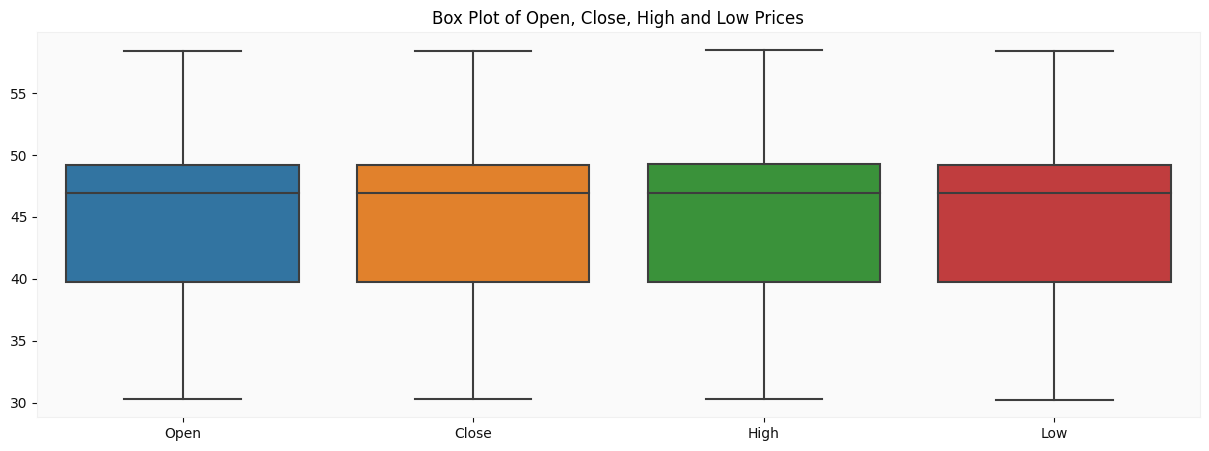

In [302]:
# Boxplot cho các giá trị Open, Close, High và Low
plt.figure(figsize=(15, 5))
sns.boxplot(data = fpt_stock[['Open', 'Close', 'High', 'Low']])
plt.title('Box Plot of Open, Close, High and Low Prices')
plt.grid(False)
plt.show()

In [303]:
fpt_daily_avg = fpt_stock.groupby('Date').mean()
fpt_daily_avg.head()

,Open,High,Low,Close,Volume,Open Interest,Price_Change
Date,,,,,,,
2018-12-25,30.760000,30.781429,30.744286,30.760000,12137.142857,0.0,0.031429
2018-12-26,31.048016,31.054683,31.042857,31.050159,2647.539683,0.0,0.003016
2018-12-27,31.332537,31.335821,31.327313,31.331567,3394.477612,0.0,-0.001119
2018-12-28,31.322213,31.326803,31.318525,31.321557,3173.524590,0.0,0.000000
2019-01-02,31.231709,31.238376,31.224188,31.232393,3924.102564,0.0,-0.003504


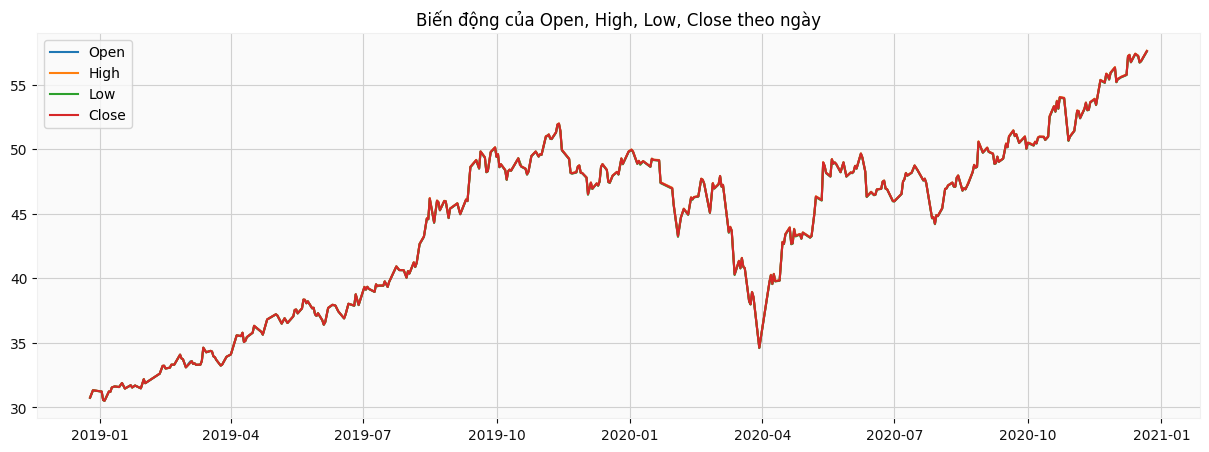

In [304]:
# Vẽ biểu đồ biến động của Open, High, Low, Close theo ngày
plt.figure(figsize=(15, 5))
plt.plot(fpt_daily_avg.index, fpt_daily_avg['Open'], label='Open')
plt.plot(fpt_daily_avg.index, fpt_daily_avg['High'], label='High')
plt.plot(fpt_daily_avg.index, fpt_daily_avg['Low'], label='Low')
plt.plot(fpt_daily_avg.index, fpt_daily_avg['Close'], label='Close')
plt.title('Biến động của Open, High, Low, Close theo ngày')
plt.legend()
plt.show()


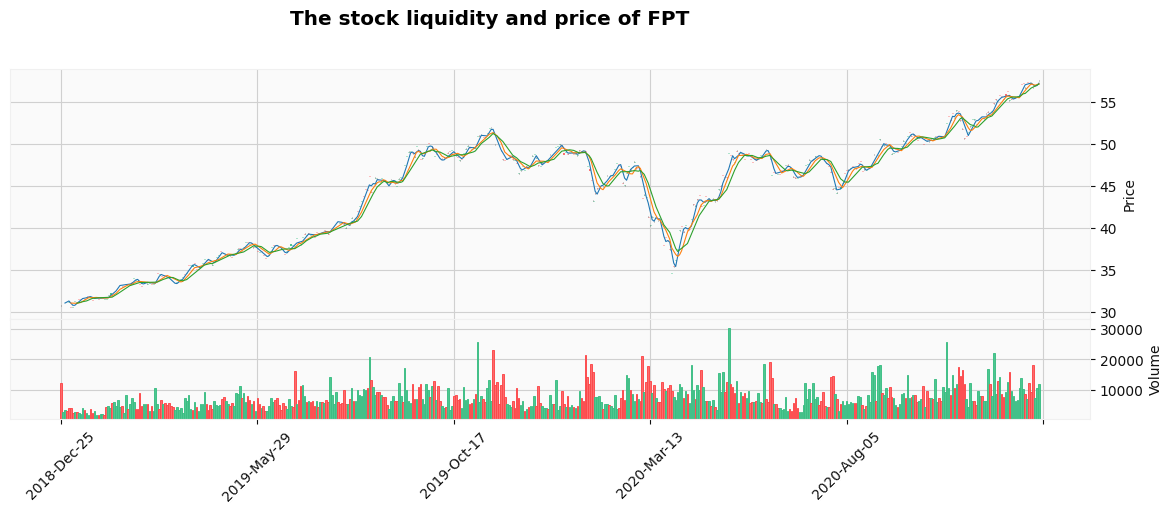

In [305]:
fpt_df = fpt_stock.copy()
fpt_stock_dt = fpt_df.set_index('Date/Time', inplace=True)
fpt_daily_avg = fpt_df.resample('D').mean().dropna()

# Vẽ biểu đồ nến
mpf.plot(
    fpt_daily_avg,
    type='candle',
    volume=True,
    title="The stock liquidity and price of FPT",
    ylabel='Price',
    ylabel_lower='Volume',
    style='yahoo',
    mav=(3, 6, 9),
    figsize=(15, 5)
)


Qua 2 biểu đồ trên hiển thị giá cổ phiếu và khối lượng giao dịch của tập đoàn FPT trong khoảng thời gian từ cuối năm 2018 đến cuối năm 2020. Nhận thấy:
- Các giá trị open, close, high, low có giá trị hầu như tương đương nhau trong một ngày giao dịch.
- Giá cổ phiếu có xu hướng tăng trong dài hạn. Trong khoảng thời gian từ tháng 1 năm 2019 đến tháng 7 năm 2020, giá cổ phiếu đã tăng từ 30 lên 60, tương đương mức tăng 100%. Điều này cho thấy rằng công ty đã hoạt động tốt trong khoảng thời gian này.
- Giá cổ phiếu có biến động mạnh trong ngắn hạn. Biểu đồ cho thấy rằng giá cổ phiếu có xu hướng biến động mạnh trong ngắn hạn. Ví dụ, trong tháng 4 năm 2020, giá cổ phiếu đã giảm từ 45 xuống 35, tương đương mức giảm 25%. Điều này cho thấy rằng thị trường có nhiều biến động đối với cổ phiếu này.
- Khối lượng giao dịch có xu hướng tăng trong dài hạn và có biến động mạnh trong ngắn hạn. Ví dụ, trong tháng giữa tháng 5 năm 2020, khối lượng giao dịch đã tăng đột biến lên 30,000.
Nhìn chung, biểu đồ cho thấy rằng cổ phiếu này có tiềm năng tăng trưởng tốt trong dài hạn, nhưng cũng có khả năng biến động mạnh trong ngắn hạn.

In [29]:
def calculate_streaks(series):
    positive_streaks = []
    negative_streaks = []
    current_streak = 1
    
    for i in range(1, len(series)):
        if (series[i] >= 0 and series[i-1] >= 0) or (series[i] < 0 and series[i-1] < 0):
            current_streak += 1
        else:
            if series[i-1] >= 0:
                positive_streaks.append(current_streak)
            elif series[i-1] < 0:
                negative_streaks.append(current_streak)
            current_streak = 1
    
    # Add the last streak
    if series[-1] >= 0:
        positive_streaks.append(current_streak)
    elif series[-1] < 0:
        negative_streaks.append(current_streak)
    
    return positive_streaks, negative_streaks

In [307]:
# Lấy danh sách chuỗi dương (bao gồm 0) và chuỗi âm
positive_streaks, negative_streaks = calculate_streaks(fpt_daily_avg['Price_Change'])

# Tính toán trung bình độ dài chuỗi dương (bao gồm 0) và chuỗi âm
avg_positive_streak = sum(positive_streaks) / len(positive_streaks) if positive_streaks else 0
avg_negative_streak = sum(negative_streaks) / len(negative_streaks) if negative_streaks else 0

print(f"Trung bình số ngày có giá trị dương liên tiếp: {avg_positive_streak}")
print(f"Trung bình số ngày có giá trị âm liên tiếp: {avg_negative_streak}")

Trung bình số ngày có giá trị dương liên tiếp: 2.1313868613138687
Trung bình số ngày có giá trị âm liên tiếp: 1.5220588235294117


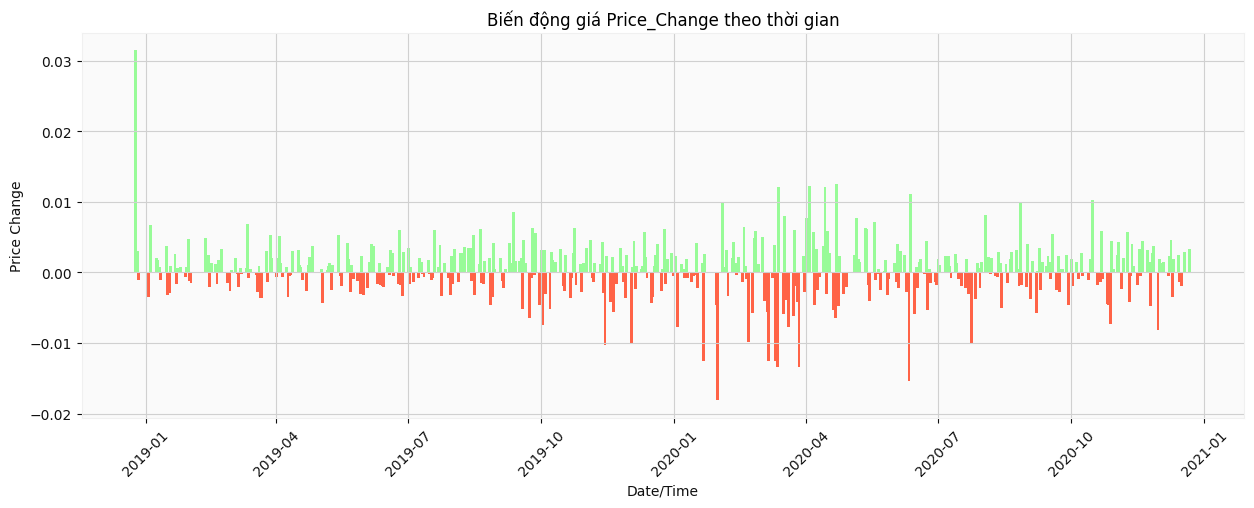

In [308]:
plt.figure(figsize=(15, 5))
plt.bar(fpt_daily_avg.index,fpt_daily_avg['Price_Change'],color=(fpt_daily_avg['Price_Change'] > 0).map({True: 'palegreen',False: 'tomato'}),width=2)
plt.xlabel('Date/Time')
plt.ylabel('Price Change')
plt.title('Biến động giá Price_Change theo thời gian')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Qua biểu đồ biến động giá với (Biến động giá cổ phiếu = Giá cổ phiếu N (ngày) sau - Giá cổ phiếu hiện tại) có thể đưa ra một số nhận xét về xu hướng biến động giá của cổ phiếu như sau:
- Biến động giá cổ phiếu có xu hướng thay đổi tăng giảm liên tục tính theo ngày có xu hướng tăng trong khoảng thời gian từ 0 đến 3 ngày và có xu hướng giảm dần trong khoảng thời gian từ 1 - 2 ngày tiếp theo và tăng dần lại. Biên độ giá trị biến động không quá cao từ 0 - 0.06 đa số dao động từ 0 đến 0.02. 

- Có khả năng biến động mạnh trong ngắn hạn (do có thể từ lên cao và giảm mạnh xuống liền ngay ngày sau đó), biến động mạnh nhất vào khoảng đầu đến giữa năm 2020.


#### **Phân tích xu hướng: Sử dụng Moving Average và Bollinger Bands**

In [310]:
def plot_stock_analysis(df_stock):
    df = df_stock.copy()
    df.set_index('Date/Time', inplace=True)
    df = df.resample('D').mean().dropna()

    # Tính toán các đường trung bình động
    df['MA50'] = df['Close'].rolling(window=50).mean()
    df['MA200'] = df['Close'].rolling(window=200).mean()

    # Tính RSI
    def calculate_rsi(df, window=14):
        delta = df['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))

    df['RSI'] = calculate_rsi(df)

    # Tính MACD
    short_ema = df['Close'].ewm(span=12, adjust=False).mean()
    long_ema = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = short_ema - long_ema
    df['Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['MACD Histogram'] = df['MACD'] - df['Signal Line']

    # Chuẩn bị các addplot cho RSI và MACD
    apds = [
        mpf.make_addplot(df['Close'], panel=0, color='green', ylabel='Close'),
        mpf.make_addplot(df['RSI'], panel=1, color='purple', ylabel='RSI'),
        mpf.make_addplot(df['MACD'], panel=2, color='greenyellow',ylabel='MACD'),
        mpf.make_addplot(df['Signal Line'], panel=2, color='red'),
        mpf.make_addplot(df['MACD Histogram'], panel=2, type='bar', color='gray', secondary_y=True)
    ]

    # Vẽ biểu đồ
    mpf.plot(df,
             type='candle',
             style='yahoo',
             volume=True,
             mav=(50, 200),
             addplot=apds,
             title='Candlestick Chart with Technical Indicators',
             ylabel='Price',
             ylabel_lower='Volume',
             figsize=(15, 6)
    )
    

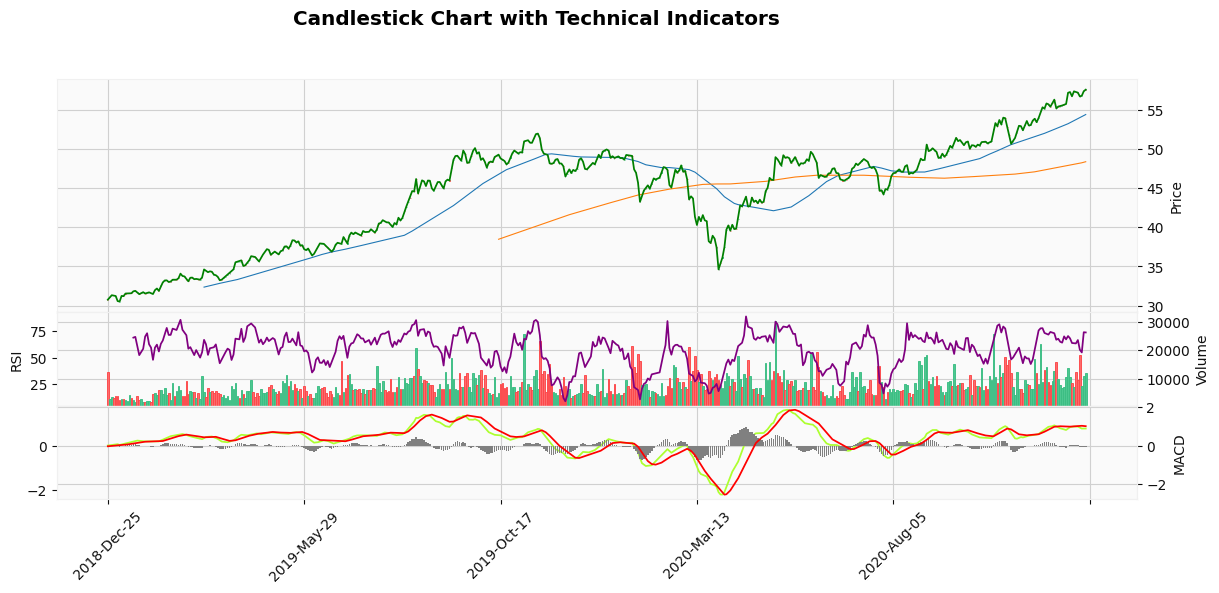

In [311]:
plot_stock_analysis(fpt_stock)

Nhận xét về xu hướng biến động giá cổ phiếu của FPT theo RSI, MACD, MA50, và MA200
- RSI:
Biến động vừa phải: Chỉ số RSI dao động trong khoảng 30-70, với một số đợt vượt quá ngưỡng này, cho thấy không quá nhiều thời điểm quá mua hoặc quá bán.
Tăng trưởng ổn định: RSI duy trì ở mức tương đối cao, phản ánh sự tăng trưởng ổn định của cổ phiếu.
- MACD:
MACD cắt lên trên đường tín hiệu nhiều lần, đặc biệt là từ giữa năm 2019, cho thấy xu hướng tăng dài hạn.
Histogram của MACD chủ yếu nằm trên đường trung tính, cho thấy áp lực mua nhiều hơn áp lực bán.
- MA50 và MA200:
    - Xu hướng tăng mạnh: MA50 duy trì trên MA200 trong phần lớn thời gian, đặc biệt là từ đầu năm 2019, báo hiệu xu hướng tăng mạnh và bền vững.
    - Giai đoạn phục hồi: Đầu năm 2020, giá cổ phiếu giảm xuống dưới MA50 và MA200 do ảnh hưởng của COVID-19, nhưng nhanh chóng phục hồi và MA50 cắt lên trên MA200 vào giữa năm 2020, báo hiệu sự trở lại của xu hướng tăng.

#### **Backtest chiến lược để xác định lợi nhuận và tỷ suất lợi nhuận: Sử dụng Bollinger Bands, Keltner Channel, RSI**

In [312]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
from math import floor
from termcolor import colored as cl

In [313]:
fpt_df = fpt_stock.copy()
fpt_df.set_index('Date/Time', inplace=True)

In [315]:
# BOLLINGER BANDS CALCULATION

def sma(data, lookback):
    sma = data.rolling(lookback).mean()
    return sma

def get_bb(data, lookback):
    std = data.rolling(lookback).std()
    upper_bb = sma(data, lookback) + std * 2
    lower_bb = sma(data, lookback) - std * 2
    middle_bb = sma(data, lookback)
    return upper_bb, middle_bb, lower_bb

# KELTNER CHANNEL CALCULATION

def get_kc(high, low, close, kc_lookback, multiplier, atr_lookback):
    tr1 = pd.DataFrame(high - low)
    tr2 = pd.DataFrame(abs(high - close.shift()))
    tr3 = pd.DataFrame(abs(low - close.shift()))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.ewm(alpha = 1/atr_lookback).mean()
    
    kc_middle = close.ewm(kc_lookback).mean()
    kc_upper = close.ewm(kc_lookback).mean() + multiplier * atr
    kc_lower = close.ewm(kc_lookback).mean() - multiplier * atr
    
    return kc_middle, kc_upper, kc_lower


In [316]:
# RSI CALCULATION
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

# TRADING STRATEGY

def bb_kc_rsi_strategy(prices, upper_bb, lower_bb, kc_upper, kc_lower, rsi):
    buy_price = []
    sell_price = []
    bb_kc_rsi_signal = []
    signal = 0
    
    for i in range(len(prices)):
        if lower_bb[i] < kc_lower[i] and upper_bb[i] > kc_upper[i] and rsi[i] < 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                bb_kc_rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_kc_rsi_signal.append(0)
                
        elif lower_bb[i] < kc_lower[i] and upper_bb[i] > kc_upper[i] and rsi[i] > 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                bb_kc_rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_kc_rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_kc_rsi_signal.append(0)
                        
    return buy_price, sell_price, bb_kc_rsi_signal

In [317]:
fpt_df['upper_bb'], fpt_df['middle_bb'], fpt_df['lower_bb'] = get_bb(fpt_df['Close'], 20) 
fpt_df['kc_middle'], fpt_df['kc_upper'], fpt_df['kc_lower'] = get_kc(fpt_df['High'], fpt_df['Low'], fpt_df['Close'], 20, 2, 10)

In [318]:
fpt_df['rsi_14'] = get_rsi(fpt_df['Close'], 14)
fpt_df = fpt_df.dropna()
buy_price, sell_price, bb_kc_rsi_signal = bb_kc_rsi_strategy(fpt_df['Close'], fpt_df['upper_bb'], fpt_df['lower_bb'], fpt_df['kc_upper'], fpt_df['kc_lower'], fpt_df['rsi_14'])

In [319]:
def generate_strategy(df,bb_kc_rsi_signal):
    kc_upper = df['kc_upper']
    kc_lower = df['kc_lower']
    upper_bb = df['upper_bb'] 
    lower_bb = df['lower_bb']
    rsi = df['rsi_14']
    close_price = df['Close']

    position = []
    for i in range(len(bb_kc_rsi_signal)):
        if bb_kc_rsi_signal[i] > 1:
            position.append(0)
        else:
            position.append(1)

    for i in range(len(df['Close'])):
        if bb_kc_rsi_signal[i] == 1:
            position[i] = 1
        elif bb_kc_rsi_signal[i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]

    bb_kc_rsi_signal_df = pd.DataFrame(bb_kc_rsi_signal, columns=['bb_kc_rsi_signal'], index=df.index)
    position_df = pd.DataFrame(position, columns=['bb_kc_rsi_position'], index=df.index)

    frames = [close_price, kc_upper, kc_lower, upper_bb, lower_bb, rsi, bb_kc_rsi_signal_df, position_df]
    strategy = pd.concat(frames, join='inner', axis=1)

    return strategy

In [320]:
# BACKTESTING
def calculate_investment_returns(df, strategy, investment_value=100000):
    # Tính toán lợi nhuận hàng ngày từ chiến lược giao dịch
    fpt_ret = pd.DataFrame(np.diff(df['Close'])).rename(columns={0: 'returns'})
    bb_kc_rsi_strategy_ret = []

    for i in range(len(fpt_ret)):
        returns = fpt_ret['returns'][i] * strategy['bb_kc_rsi_position'][i]
        bb_kc_rsi_strategy_ret.append(returns)

    bb_kc_rsi_strategy_ret_df = pd.DataFrame(bb_kc_rsi_strategy_ret).rename(columns={0: 'bb_kc_rsi_returns'})

    # Tính toán lợi nhuận từ đầu tư theo chiến lược
    bb_kc_rsi_investment_ret = []

    for i in range(len(bb_kc_rsi_strategy_ret_df['bb_kc_rsi_returns'])):
        number_of_stocks = floor(investment_value / df['Close'][i])
        returns = number_of_stocks * bb_kc_rsi_strategy_ret_df['bb_kc_rsi_returns'][i]
        bb_kc_rsi_investment_ret.append(returns)

    bb_kc_rsi_investment_ret_df = pd.DataFrame(bb_kc_rsi_investment_ret).rename(columns={0: 'investment_returns'})

    # Tính toán tổng lợi nhuận đầu tư và tỷ lệ lợi nhuận
    total_investment_ret = round(sum(bb_kc_rsi_investment_ret_df['investment_returns']), 2)
    profit_percentage = floor((total_investment_ret / investment_value) * 100)


    return total_investment_ret, profit_percentage

In [321]:
strategy = generate_strategy(fpt_df,bb_kc_rsi_signal)
total_investment_ret, profit_percentage = calculate_investment_returns(fpt_df, strategy, investment_value=100000)
print(cl('Profit gained from the BB KC RSI strategy by investing 100000 VND in FPT : {}'.format(total_investment_ret), attrs=['bold']))
print(cl('Profit percentage of the BB KC RSI strategy : {}%'.format(profit_percentage), attrs=['bold']))

Profit gained from the BB KC RSI strategy by investing 100000 VND in FPT : 55433.92
Profit percentage of the BB KC RSI strategy : 55%


### **PNJ:**

In [89]:
pnj_stock.describe()

,Open,High,Low,Close,Volume,Open Interest,Price_Change
count,125308.000000,125308.000000,125308.000000,125308.000000,125308.000000,125308.0,125308.000000
mean,72.182005,72.372537,72.042239,72.179317,3031.852491,0.0,-0.000006
std,9.900288,9.995809,9.830871,9.899422,7248.977694,0.0,0.690948
min,44.430000,44.530000,44.040000,44.140000,1.000000,0.0,-6.000000
25%,64.600000,64.700000,64.570000,64.600000,220.000000,0.0,-0.070000
50%,72.800000,73.010000,72.640000,72.830000,1000.000000,0.0,0.000000
75%,80.160000,80.350000,80.060000,80.160000,3130.000000,0.0,0.070000
max,100.160000,100.160000,100.160000,100.160000,580730.000000,0.0,3.500000


Trong khoảng thời gian gần 2 năm (đầu 2018 đến cuối 2020) gồm 125309 giao dịch diễn ra với:
- Giá mở cửa (Open), cao nhất (High), thấp nhất (Low) và đóng cửa (Close) đều có giá trị trung bình xấp xỉ gần 72, cho thấy biến động giá không quá lớn trong giai đoạn quan sát.
- Độ lệch chuẩn (std) của các giá đều xấp xỉ 9.9, chỉ ra mức độ biến thiên tương đối so với giá trung bình.
- Giá đóng cửa cao nhất là 100.16 và thấp nhất là 44.14, phạm vi biến thiên khá rộng.
- Khối lượng giao dịch (Volume) và lãi/lỗ (Price_Change) có giá trị trung bình và độ lệch chuẩn khá cao, phản ánh tính thanh khoản và biến động giá của mã chứng khoán này.

In [72]:
pnj_stock['Open Interest'].sum()

0

Số lượng hợp đồng mở Open Interest trong khoảng thời gian này là 0

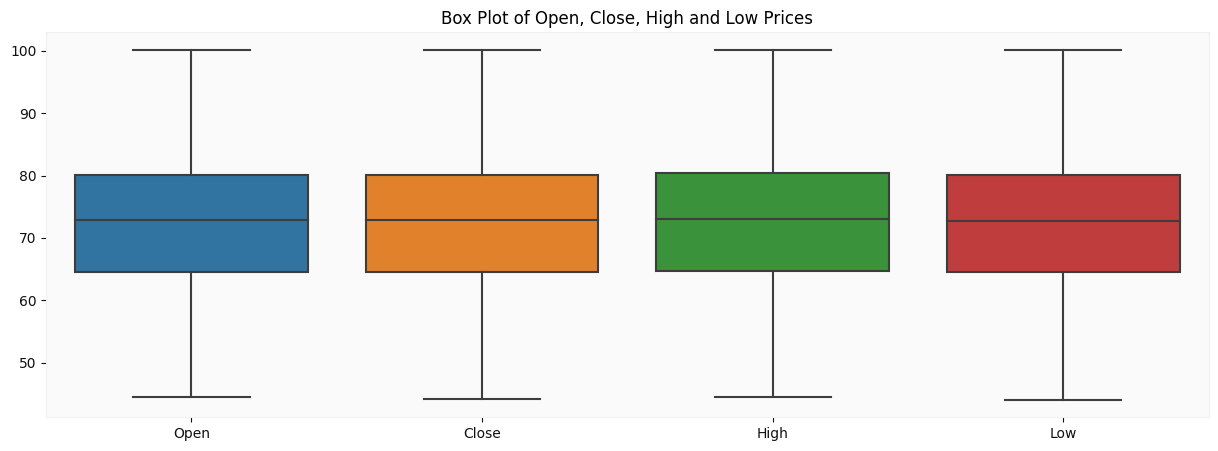

In [322]:
# Boxplot cho các giá trị Open, Close, High và Low
plt.figure(figsize=(15, 5))
sns.boxplot(data = pnj_stock[['Open', 'Close', 'High', 'Low']])
plt.title('Box Plot of Open, Close, High and Low Prices')
plt.grid(False)
plt.show()

In [323]:
pnj_daily_avg = pnj_stock.groupby('Date').mean()
pnj_daily_avg.head()

,Open,High,Low,Close,Volume,Open Interest,Price_Change
Date,,,,,,,
2018-02-28,78.720430,78.799355,78.651183,78.716989,87.720430,0.0,-0.009140
2018-03-01,78.605526,78.636513,78.569934,78.606184,134.940789,0.0,-0.006250
2018-03-02,77.274695,77.295488,77.257866,77.280610,227.280488,0.0,-0.000305
2018-03-05,78.757226,78.823806,78.702129,78.755935,178.948387,0.0,0.023355
2018-03-06,80.035815,80.169565,79.956685,80.036957,223.244565,0.0,0.005543


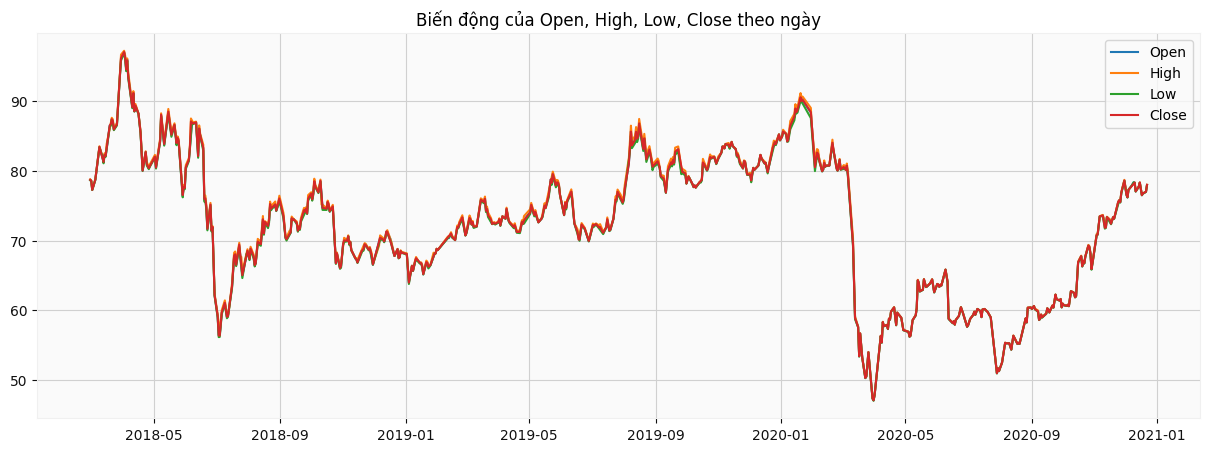

In [324]:
# Vẽ biểu đồ biến động của Open, High, Low, Close theo ngày
plt.figure(figsize=(15, 5))
plt.plot(pnj_daily_avg.index, pnj_daily_avg['Open'], label='Open')
plt.plot(pnj_daily_avg.index, pnj_daily_avg['High'], label='High')
plt.plot(pnj_daily_avg.index, pnj_daily_avg['Low'], label='Low')
plt.plot(pnj_daily_avg.index, pnj_daily_avg['Close'], label='Close')
plt.title('Biến động của Open, High, Low, Close theo ngày')
plt.legend()
plt.show()


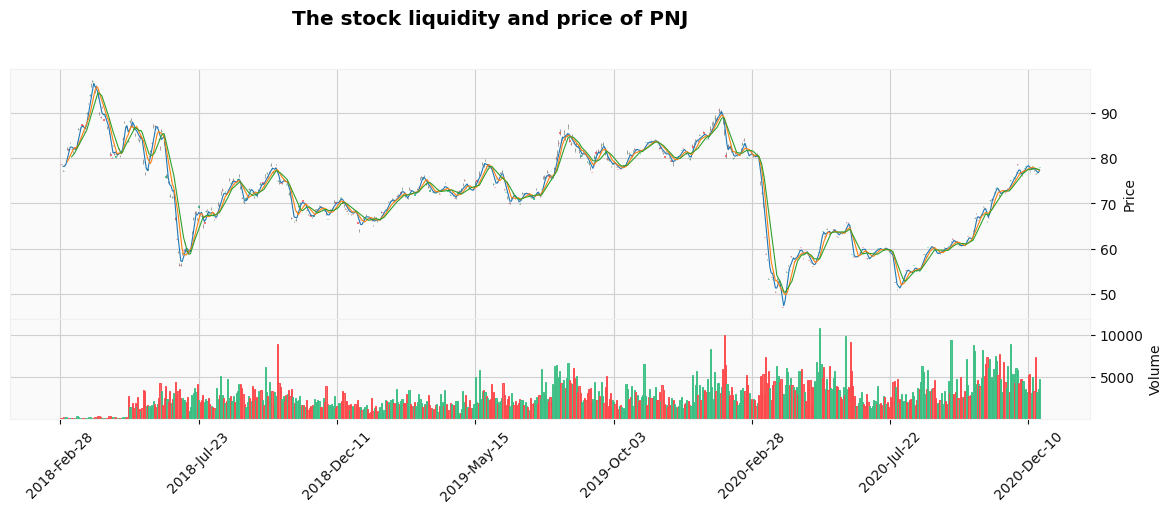

In [325]:
pnj_df = pnj_stock.copy()
pnj_stock_dt = pnj_df.set_index('Date/Time', inplace=True)
pnj_daily_avg = pnj_df.resample('D').mean().dropna()

# Vẽ biểu đồ nến
mpf.plot(
    pnj_daily_avg,
    type='candle',
    volume=True,
    title="The stock liquidity and price of PNJ",
    ylabel='Price',
    ylabel_lower='Volume',
    style='yahoo',
    mav=(3, 6, 9),
    figsize=(15, 5)
)


Qua 2 biểu đồ trên hiển thị giá cổ phiếu và khối lượng giao dịch của tập đoàn PNJ trong khoảng thời gian từ đầu năm 2018 đến cuối năm 2020. Nhận thấy:

- Biến động giá: Các giá trị open, close, high, low có giá trị hầu như tương đương nhau trong một ngày giao dịch.

    - Đầu năm 2018 đến giữa năm 2018: Giá cổ phiếu PNJ tăng mạnh, đạt đỉnh vào khoảng tháng 4 năm 2018. Giữa năm 2018 đến đầu năm 2019: Sau khi đạt đỉnh, giá cổ phiếu PNJ giảm đáng kể và sau đó có những giai đoạn biến động nhẹ nhưng không rõ xu hướng tăng hay giảm cụ thể.
    - Đầu năm 2019 đến cuối năm 2019: Giá cổ phiếu PNJ có sự phục hồi và duy trì ở mức khá ổn định, với một số giai đoạn tăng nhẹ.
    - Đầu năm 2020 đến giữa năm 2020: Giá cổ phiếu PNJ giảm mạnh, có thể do ảnh hưởng của đại dịch COVID-19. Đây là giai đoạn giảm giá lớn nhất trong khoảng thời gian được xem xét.
Giữa năm 2020 đến cuối năm 2020: Sau đợt giảm mạnh, giá cổ phiếu PNJ phục hồi đáng kể và tiếp tục xu hướng tăng đến cuối năm.
- Thanh khoản (Volume):

    - Thanh khoản của cổ phiếu PNJ cũng biến động khá mạnh, đặc biệt là trong các giai đoạn có biến động giá lớn.
    - Các cột màu xanh lá (khối lượng giao dịch mua vượt trội) và màu đỏ (khối lượng giao dịch bán vượt trội) cho thấy các phiên giao dịch có sự thay đổi lớn trong khối lượng mua và bán.
Giai đoạn giảm giá mạnh đầu năm 2020 đi kèm với sự tăng vọt trong khối lượng giao dịch, cho thấy nhiều nhà đầu tư có phản ứng mạnh mẽ, có thể là do bán tháo cổ phiếu.


- Các đỉnh và đáy của giá cổ phiếu PNJ thường đi kèm với sự tăng vọt trong khối lượng giao dịch, điều này cho thấy các nhà đầu tư phản ứng mạnh mẽ trong các giai đoạn thị trường biến động lớn.
Sau các giai đoạn giảm giá mạnh, khối lượng giao dịch tăng cao cũng xuất hiện trong giai đoạn phục hồi, cho thấy sự quan tâm của nhà đầu tư vào cổ phiếu PNJ khi giá cổ phiếu bắt đầu tăng trở lại.

In [326]:
# Lấy danh sách chuỗi dương (bao gồm 0) và chuỗi âm
positive_streaks, negative_streaks = calculate_streaks(pnj_daily_avg['Price_Change'])

# Tính toán trung bình độ dài chuỗi dương (bao gồm 0) và chuỗi âm
avg_positive_streak = sum(positive_streaks) / len(positive_streaks) if positive_streaks else 0
avg_negative_streak = sum(negative_streaks) / len(negative_streaks) if negative_streaks else 0

print(f"Trung bình số ngày có giá trị dương liên tiếp: {avg_positive_streak}")
print(f"Trung bình số ngày có giá trị âm liên tiếp: {avg_negative_streak}")

Trung bình số ngày có giá trị dương liên tiếp: 1.9086294416243654
Trung bình số ngày có giá trị âm liên tiếp: 1.6903553299492386


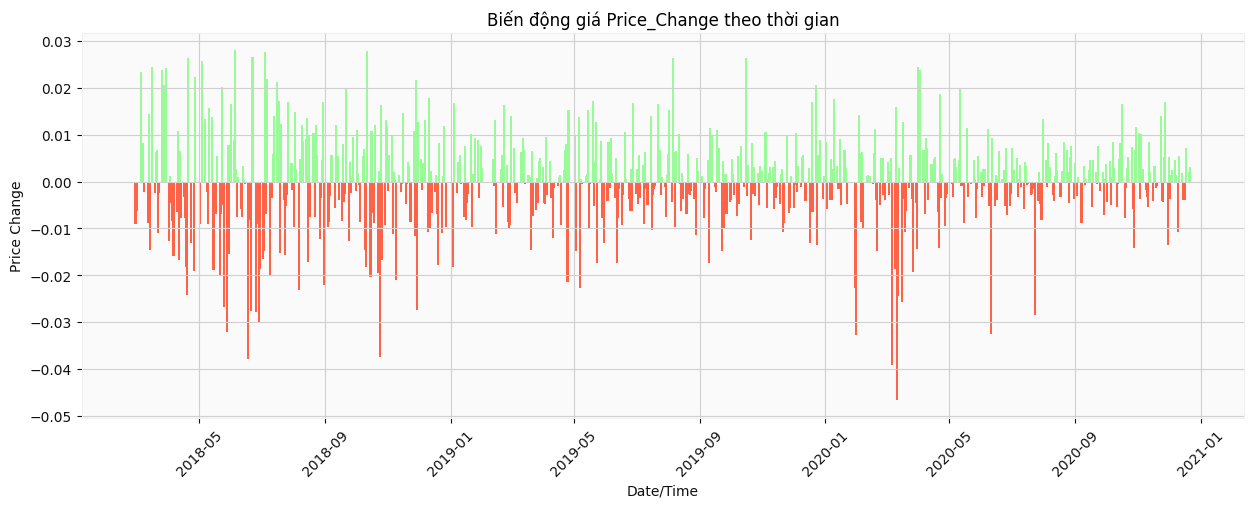

In [327]:
plt.figure(figsize=(15, 5))
plt.bar(pnj_daily_avg.index,pnj_daily_avg['Price_Change'],color=(pnj_daily_avg['Price_Change'] > 0).map({True: 'palegreen',False: 'tomato'}),width=2)
plt.xlabel('Date/Time')
plt.ylabel('Price Change')
plt.title('Biến động giá Price_Change theo thời gian')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Qua biểu đồ biến động giá với (Biến động giá cổ phiếu = Giá cổ phiếu N (ngày) sau - Giá cổ phiếu hiện tại) có thể đưa ra một số nhận xét về xu hướng biến động giá của cổ phiếu như sau:
- Biến động giá cổ phiếu có xu hướng thay đổi tăng giảm liên tục tính theo ngày có xu hướng tăng lên từ 1 - 2 ngày và giảm liên tục 1 -2 ngày tiếp theo và tăng dần lại rồi giảm tiếp. Biên độ giá trị biến động từ 0 - 0.07 đa số dao động từ 0 đến 0.02. 
- Cổ phiếu này có khả năng biến động mạnh trong ngắn hạn (có thể từ lên cao và giảm mạnh xuống liền ngay ngày sau đó), biến độ mạnh nhất vào giữa năm 2018 và khoảng đầu đến giữa năm 2020.


#### **Phân tích xu hướng: Sử dụng Moving Average và Bollinger Bands**

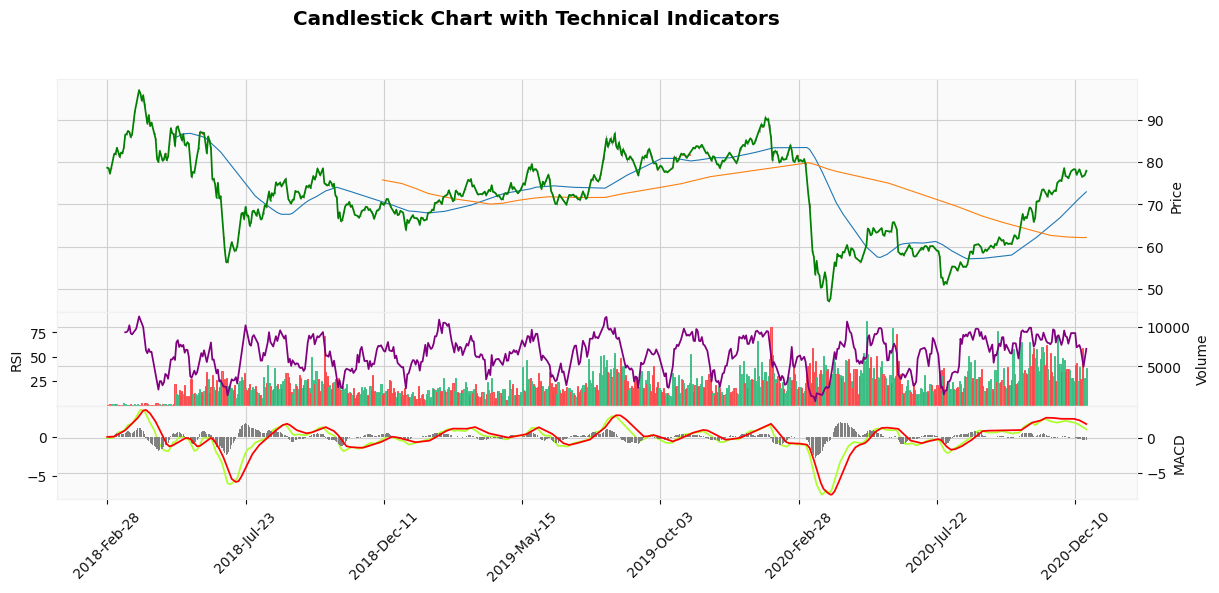

In [328]:
plot_stock_analysis(pnj_stock)

Nhận xét về xu hướng biến động giá dựa trên RSI, MACD, MA50 và MA200:

- RSI: Biến động lớn: Chỉ số RSI cho thấy những biến động lớn trong suốt giai đoạn từ 2018 đến 2020.
Điểm quá mua/quá bán: RSI thường xuyên vượt qua ngưỡng 70 (quá mua) và dưới ngưỡng 30 (quá bán), cho thấy những thời điểm mà cổ phiếu PNJ có thể bị mua quá mức hoặc bán quá mức. Đặc biệt, vào các giai đoạn đầu năm 2018 và giữa năm 2020, RSI cho thấy tín hiệu quá bán, sau đó giá cổ phiếu có xu hướng tăng trở lại.
- MACD: Giao cắt giữa đường MACD và đường tín hiệu (Signal line) thường xuyên xảy ra, báo hiệu các thay đổi trong xu hướng giá cổ phiếu.
Phần histogram của MACD cho thấy sự biến động mạnh, đặc biệt là vào các thời điểm khủng hoảng như đầu năm 2020, khi giá cổ phiếu giảm mạnh. Sau đó, MACD cho thấy tín hiệu tăng trở lại khi đường MACD cắt lên trên đường tín hiệu.
- MA50 và MA200: 
    - Giá cổ phiếu dao động quanh MA50 và MA200, với MA50 thường xuyên nằm trên MA200, báo hiệu xu hướng tăng trong giai đoạn đầu 2018 đến cuối 2019:.
    - Đầu năm 2020, khi giá cổ phiếu giảm mạnh do ảnh hưởng của đại dịch COVID-19, MA50 cắt xuống dưới MA200, báo hiệu xu hướng giảm mạnh.
    - Giữa năm 2020 đến cuối 2020, giá cổ phiếu phục hồi, và MA50 bắt đầu cắt lên trên MA200 vào cuối năm 2020, báo hiệu xu hướng tăng trở lại.

#### **Backtest chiến lược để xác định lợi nhuận và tỷ suất lợi nhuận: Sử dụng Bollinger Bands, Keltner Channel, RSI**

In [329]:
pnj_df = pnj_stock.copy()
pnj_df.set_index('Date/Time', inplace=True)

In [330]:
pnj_df['upper_bb'], pnj_df['middle_bb'], pnj_df['lower_bb'] = get_bb(pnj_df['Close'], 20) 
pnj_df['kc_middle'], pnj_df['kc_upper'], pnj_df['kc_lower'] = get_kc(pnj_df['High'], pnj_df['Low'], pnj_df['Close'], 20, 2, 10)

In [331]:
pnj_df['rsi_14'] = get_rsi(pnj_df['Close'], 14)
pnj_df = pnj_df.dropna()
buy_price, sell_price, bb_kc_rsi_signal = bb_kc_rsi_strategy(pnj_df['Close'], pnj_df['upper_bb'], pnj_df['lower_bb'], pnj_df['kc_upper'], pnj_df['kc_lower'], pnj_df['rsi_14'])

In [332]:
strategy = generate_strategy(pnj_df,bb_kc_rsi_signal)
total_investment_ret, profit_percentage = calculate_investment_returns(pnj_df, strategy, investment_value=100000)
print(cl('Profit gained from the BB KC RSI strategy by investing 100000 VND in PNJ : {}'.format(total_investment_ret), attrs=['bold']))
print(cl('Profit percentage of the BB KC RSI strategy : {}%'.format(profit_percentage), attrs=['bold']))

Profit gained from the BB KC RSI strategy by investing 100000 VND in PNJ : 185145.59
Profit percentage of the BB KC RSI strategy : 185%


### **MSN:**

In [101]:
msn_stock.describe()

,Open,High,Low,Close,Volume,Open Interest,Price_Change
count,135353.000000,135353.000000,135353.000000,135353.000000,1.353530e+05,135353.0,135353.000000
mean,74.878822,74.931681,74.834638,74.880772,5.683589e+03,0.0,0.000072
std,15.418130,15.427010,15.412733,15.418913,2.798524e+04,0.0,0.216196
min,46.500000,46.500000,46.400000,46.400000,1.000000e+01,0.0,-5.900000
25%,57.900000,57.900000,57.800000,57.800000,5.000000e+02,0.0,0.000000
50%,79.100000,79.200000,79.100000,79.100000,2.000000e+03,0.0,0.000000
75%,86.000000,86.100000,86.000000,86.000000,5.560000e+03,0.0,0.000000
max,117.800000,118.000000,117.700000,118.000000,3.300680e+06,0.0,7.200000


Trong khoảng thời gian  từ cuối năm 2017 và kéo dài đến cuối năm 2020 gồm 135353 giao dịch diễn ra với:
- Giá mở cửa (Open), cao nhất (High), thấp nhất (Low) và đóng cửa (Close) đều có giá trị trung bình xấp xỉ gần 74.9, cho thấy không có biến động lớn.
- Độ lệch chuẩn (std) của các giá đều xấp xỉ 15.4, chỉ ra mức độ biến thiên tương đối so với giá trung bình.
- Giá đóng cửa cao nhất là 118 và thấp nhất là 46.4, phạm vi biến thiên khá rộng.
- Khối lượng giao dịch (Volume) và lãi/lỗ (Price_Change) có giá trị trung bình và độ lệch chuẩn khá cao, phản ánh tính thanh khoản và biến động giá của mã chứng khoán này.

In [102]:
msn_stock['Open Interest'].sum()

0

Số lượng hợp đồng mở Open Interest trong khoảng thời gian này là 0

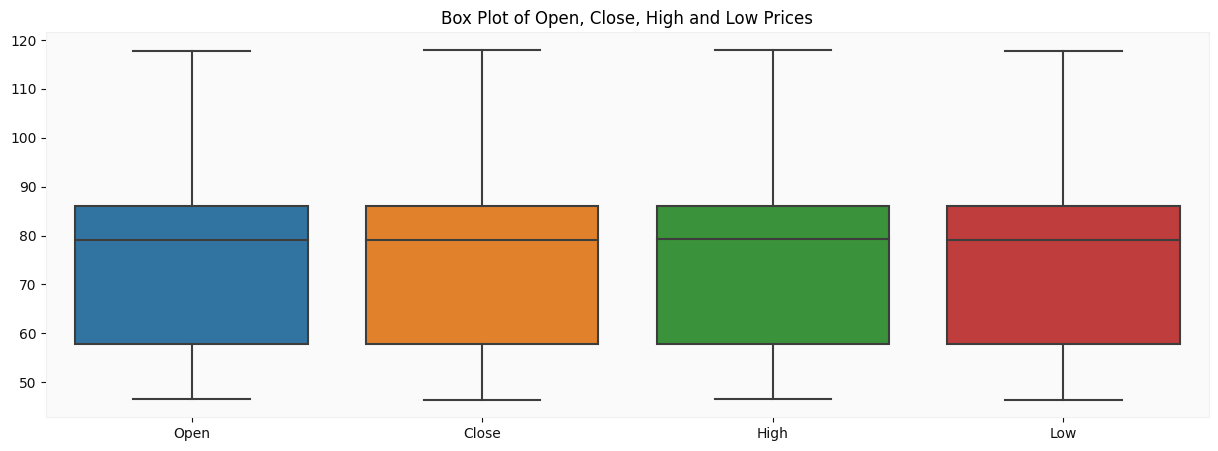

In [122]:
# Boxplot cho các giá trị Open, Close, High và Low
plt.figure(figsize=(15, 5))
sns.boxplot(data = msn_stock[['Open', 'Close', 'High', 'Low']])
plt.title('Box Plot of Open, Close, High and Low Prices')
plt.grid(False)
plt.show()

In [333]:
msn_daily_avg = msn_stock.groupby('Date').mean()
msn_daily_avg.head()

,Open,High,Low,Close,Volume,Open Interest,Price_Change
Date,,,,,,,
2017-12-25,73.750877,73.762281,73.739474,73.748246,1819.035088,0.0,0.015789
2017-12-26,74.891111,74.908889,74.874074,74.891111,2990.444444,0.0,0.000000
2017-12-27,75.285401,75.308029,75.258394,75.285401,3780.437956,0.0,0.004380
2017-12-28,75.181982,75.207207,75.173874,75.200000,3396.666667,0.0,0.004505
2017-12-29,76.541463,76.563415,76.509756,76.534146,5533.658537,0.0,0.024390


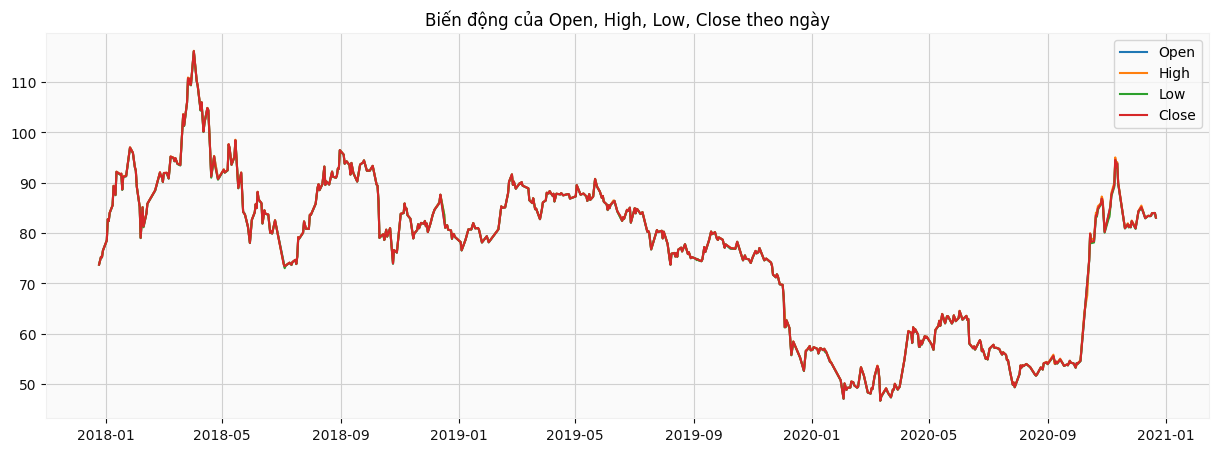

In [334]:
# Vẽ biểu đồ biến động của Open, High, Low, Close theo ngày
plt.figure(figsize=(15, 5))
plt.plot(msn_daily_avg.index, msn_daily_avg['Open'], label='Open')
plt.plot(msn_daily_avg.index, msn_daily_avg['High'], label='High')
plt.plot(msn_daily_avg.index, msn_daily_avg['Low'], label='Low')
plt.plot(msn_daily_avg.index, msn_daily_avg['Close'], label='Close')
plt.title('Biến động của Open, High, Low, Close theo ngày')
plt.legend()
plt.show()


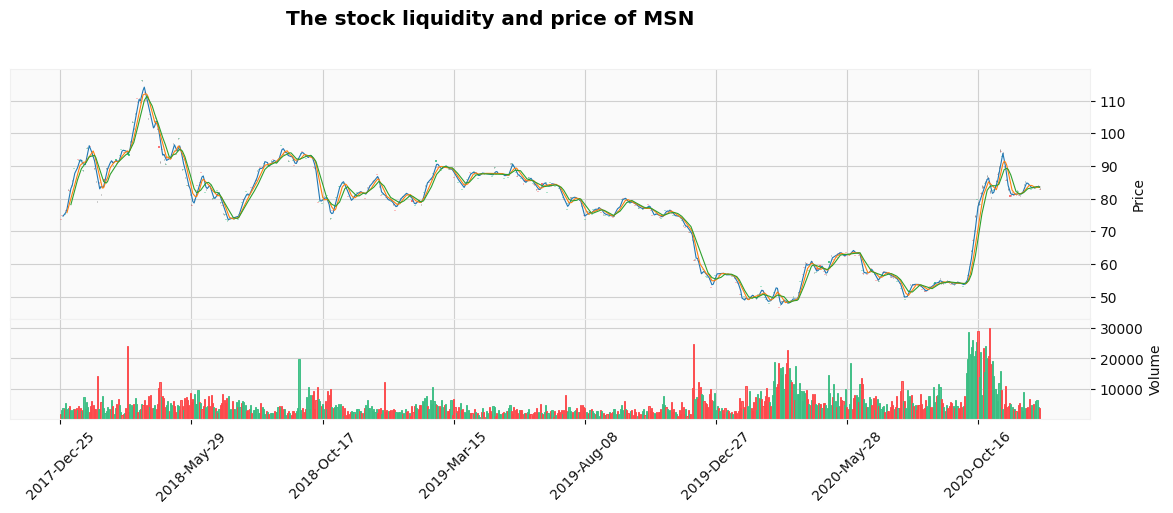

In [335]:
msn_df = msn_stock.copy()
msn_stock_dt = msn_df.set_index('Date/Time', inplace=True)
msn_daily_avg = msn_df.resample('D').mean().dropna()

# Vẽ biểu đồ nến
mpf.plot(
    msn_daily_avg,
    type='candle',
    volume=True,
    title="The stock liquidity and price of MSN",
    ylabel='Price',
    ylabel_lower='Volume',
    style='yahoo',
    mav=(3, 6, 9),
    figsize=(15, 5)
)


Qua biểu đồ trên hiển thị giá cổ phiếu và khối lượng giao dịch của MSN trong khoảng thời gian từ cuối năm 2018 đến cuối năm 2020. Nhận thấy:
Trong giai đoạn từ cuối năm 2017 đến cuối năm 2020, giá cổ phiếu MSN trải qua nhiều biến động lớn, với một đợt tăng mạnh vào năm 2018, sau đó giảm và duy trì ở mức thấp trong năm 2019, và cuối cùng tăng mạnh trở lại vào năm 2020. Thanh khoản của cổ phiếu cũng tăng theo đà tăng giá trong năm 2020, phản ánh sự quan tâm và giao dịch tăng cao từ phía nhà đầu tư.

In [336]:
# Lấy danh sách chuỗi dương (bao gồm 0) và chuỗi âm
positive_streaks, negative_streaks = calculate_streaks(msn_daily_avg['Price_Change'])

# Tính toán trung bình độ dài chuỗi dương (bao gồm 0) và chuỗi âm
avg_positive_streak = sum(positive_streaks) / len(positive_streaks) if positive_streaks else 0
avg_negative_streak = sum(negative_streaks) / len(negative_streaks) if negative_streaks else 0

print(f"Trung bình số ngày có giá trị dương liên tiếp: {avg_positive_streak}")
print(f"Trung bình số ngày có giá trị âm liên tiếp: {avg_negative_streak}")

Trung bình số ngày có giá trị dương liên tiếp: 2.01025641025641
Trung bình số ngày có giá trị âm liên tiếp: 1.8256410256410256


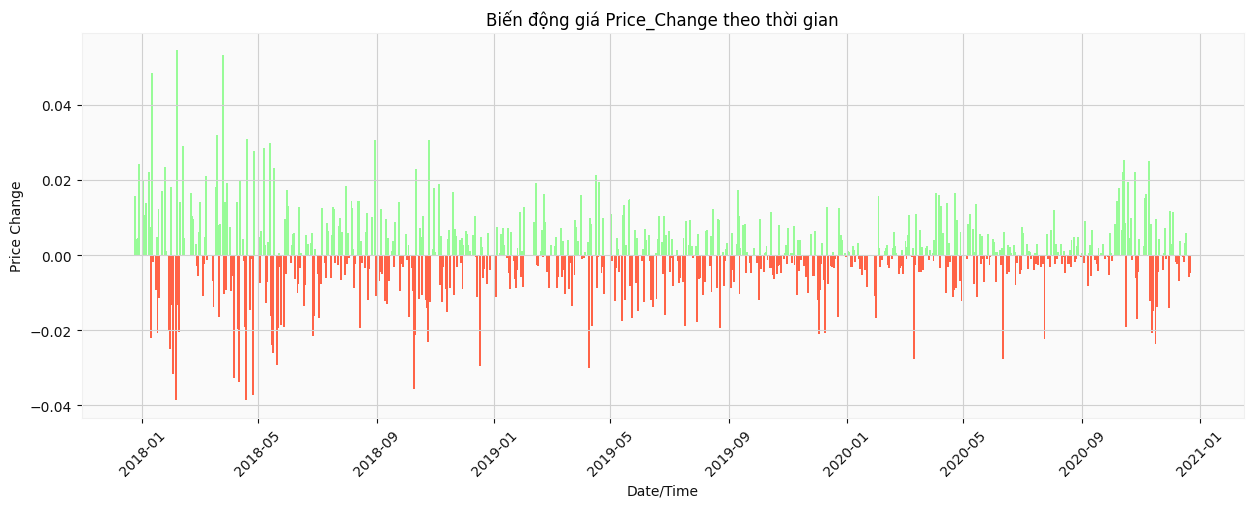

In [337]:
plt.figure(figsize=(15, 5))
plt.bar(msn_daily_avg.index,msn_daily_avg['Price_Change'],color=(msn_daily_avg['Price_Change'] > 0).map({True: 'palegreen',False: 'tomato'}),width=2)
plt.xlabel('Date/Time')
plt.ylabel('Price Change')
plt.title('Biến động giá Price_Change theo thời gian')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Qua biểu đồ biến động giá với (Biến động giá cổ phiếu = Giá cổ phiếu N (ngày) sau - Giá cổ phiếu hiện tại) có thể đưa ra một số nhận xét về xu hướng biến động giá của cổ phiếu như sau:
- Biến động giá cổ phiếu có xu hướng thay đổi tăng giảm liên tục tính theo ngày có xu hướng tăng liên tục trong vòng 2 - 3 ngày và có xu hướng giảm dần trong khoảng thời gian từ 1 - 2 ngày tiếp theo và tăng dần lại.
- Cổ phiếu này có khả năng biến động mạnh trong ngắn hạn (có thể từ lên cao và giảm mạnh xuống liền ngay ngày sau đó) biến động mạnh ở đầu đến giữa năm 2018 sau đó hông có biến dộng mạnh.


#### **Phân tích xu hướng: Sử dụng Moving Average và Bollinger Bands**

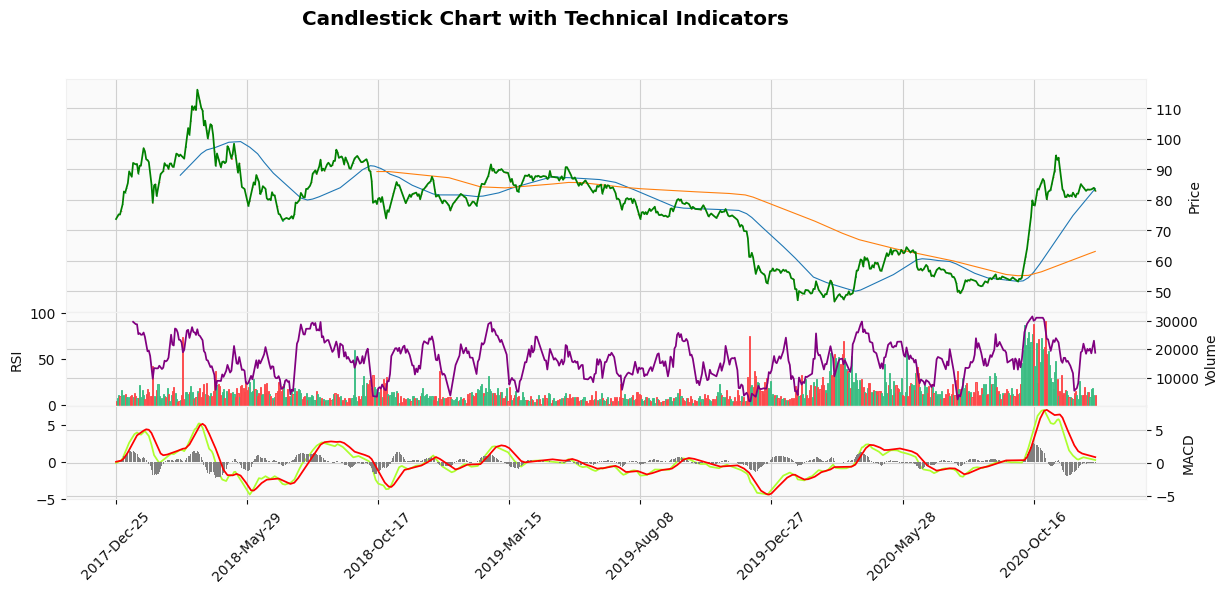

In [338]:
plot_stock_analysis(msn_stock)

Nhận xét về xu hướng biến động giá dựa trên RSI, MACD, MA50 và MA200:

- RSI: Biến động lớn với nhiều lần vượt ngưỡng 70 (quá mua) và dưới 30 (quá bán), cho thấy cổ phiếu MSN có biên độ biến động giá khá mạnh trong giai đoạn xem xét.
- MACD: Đường MACD và tín hiệu đường có nhiều lần giao cắt, báo hiệu các đợt đảo chiều xu hướng giá. Histogram của MACD cũng cho thấy sự thay đổi về mức độ biến động của giá.
- MA50 và MA200:
Giá cổ phiếu thường xuyên dao động quanh MA50 và MA200, với MA50 vẫn thường nằm trên MA200 trong hầu hết thời gian, báo hiệu xu hướng tăng giá trong dài hạn. Tuy nhiên, vào đầu năm 2020, giá đã giảm mạnh và MA50 cắt xuống dưới MA200, tín hiệu xu hướng giảm trong ngắn hạn. Gần đây, MA50 đã cắt lên trên MA200 trở lại, hỗ trợ cho xu hướng tăng giá trong thời gian tới.


#### **Backtest chiến lược để xác định lợi nhuận và tỷ suất lợi nhuận: Sử dụng Bollinger Bands, Keltner Channel, RSI**

In [339]:
msn_df = msn_stock.copy()
msn_df.set_index('Date/Time', inplace=True)

In [341]:
msn_df['upper_bb'], msn_df['middle_bb'], msn_df['lower_bb'] = get_bb(msn_df['Close'], 20) 
msn_df['kc_middle'], msn_df['kc_upper'], msn_df['kc_lower'] = get_kc(msn_df['High'], msn_df['Low'], msn_df['Close'], 20, 2, 10)

In [342]:
msn_df['rsi_14'] = get_rsi(msn_df['Close'], 14)
msn_df = msn_df.dropna()
buy_price, sell_price, bb_kc_rsi_signal = bb_kc_rsi_strategy(msn_df['Close'], msn_df['upper_bb'], msn_df['lower_bb'], msn_df['kc_upper'], msn_df['kc_lower'], msn_df['rsi_14'])

In [343]:
strategy = generate_strategy(msn_df,bb_kc_rsi_signal)
total_investment_ret, profit_percentage = calculate_investment_returns(msn_df, strategy, investment_value=100000)
print(cl('Profit gained from the BB KC RSI strategy by investing 100000 VND in MSN: {}'.format(total_investment_ret), attrs=['bold']))
print(cl('Profit percentage of the BB KC RSI strategy : {}%'.format(profit_percentage), attrs=['bold']))

Profit gained from the BB KC RSI strategy by investing 100000 VND in MSN: 58236.63
Profit percentage of the BB KC RSI strategy : 58%


### **VIC:**

In [22]:
vic_stock.describe()

,Open,High,Low,Close,Volume,Open Interest,Price_Change
count,101265.000000,101265.000000,101265.000000,101265.000000,1.012650e+05,101265.0,101265.000000
mean,105.376457,105.418516,105.334143,105.378788,3.182670e+03,0.0,0.000071
std,11.543215,11.535641,11.552395,11.545111,1.469821e+04,0.0,0.199338
min,68.000000,68.000000,68.000000,68.000000,1.000000e+01,0.0,-7.400000
25%,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.0,0.000000
50%,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.0,0.000000
75%,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.0,0.000000
max,126.100000,126.500000,126.100000,126.500000,1.468390e+06,0.0,5.000000


Trong khoảng thời gian từ giữa tháng 10 năm 2018 và kéo dài đến cuối năm 2020 gồm 101265 giao dịch diễn ra với:
- Giá mở cửa (Open), cao nhất (High), thấp nhất (Low) và đóng cửa (Close) đều có giá trị trung bình xấp xỉ gần 105.3, cho thấy biến động giá không quá lớn trong giai đoạn quan sát.
- Độ lệch chuẩn (std) của các giá đều xấp xỉ 11.5, chỉ ra mức độ biến thiên tương đối so với giá trung bình.
- Giá đóng cửa cao nhất là 126.5 và thấp nhất là 68, phạm vi biến thiên khá rộng.
- Khối lượng giao dịch (Volume) và lãi/lỗ (Price_Change) có giá trị trung bình và độ lệch chuẩn khá cao, phản ánh tính thanh khoản và biến động giá của mã chứng khoán này.

In [344]:
vic_stock['Open Interest'].sum()

0

Số lượng hợp đồng mở Open Interest trong khoảng thời gian này là 0

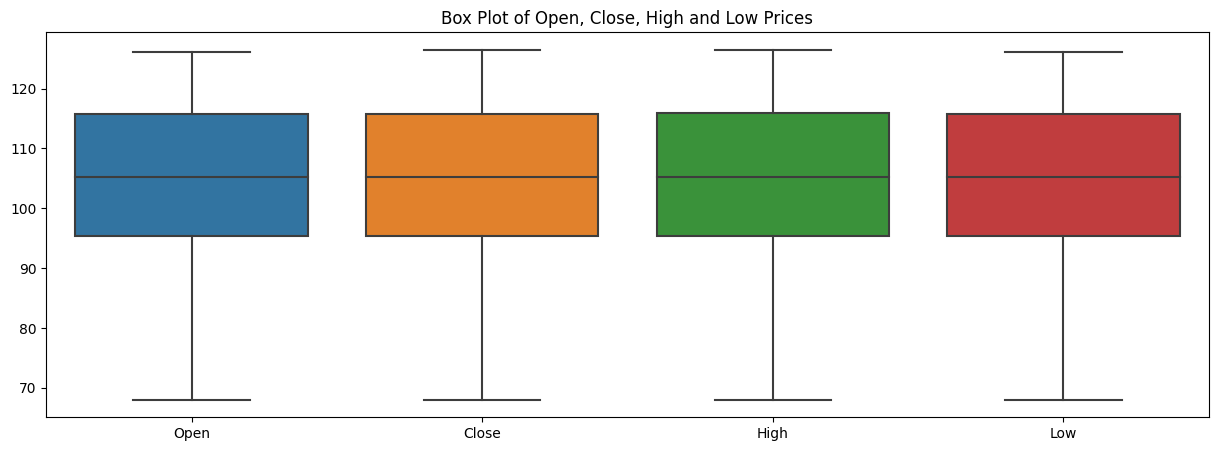

In [23]:
# Boxplot cho các giá trị Open, Close, High và Low
plt.figure(figsize=(15, 5))
sns.boxplot(data = vic_stock[['Open', 'Close', 'High', 'Low']])
plt.title('Box Plot of Open, Close, High and Low Prices')
plt.grid(False)
plt.show()

In [24]:
vic_daily_avg = vic_stock.groupby('Date').mean()
vic_daily_avg.head()

,Open,High,Low,Close,Volume,Open Interest,Price_Change
Date,,,,,,,
2018-10-17,98.645833,98.679762,98.615476,98.645238,7539.345238,0.0,0.000000
2018-10-18,98.658011,98.697238,98.640331,98.666298,4951.049724,0.0,-0.011050
2018-10-19,97.586772,97.634392,97.556614,97.602646,4845.873016,0.0,0.007937
2018-10-22,99.153333,99.203333,99.130556,99.165556,2982.944444,0.0,0.005556
2018-10-23,98.295402,98.345977,98.265517,98.312644,3498.563218,0.0,-0.005747


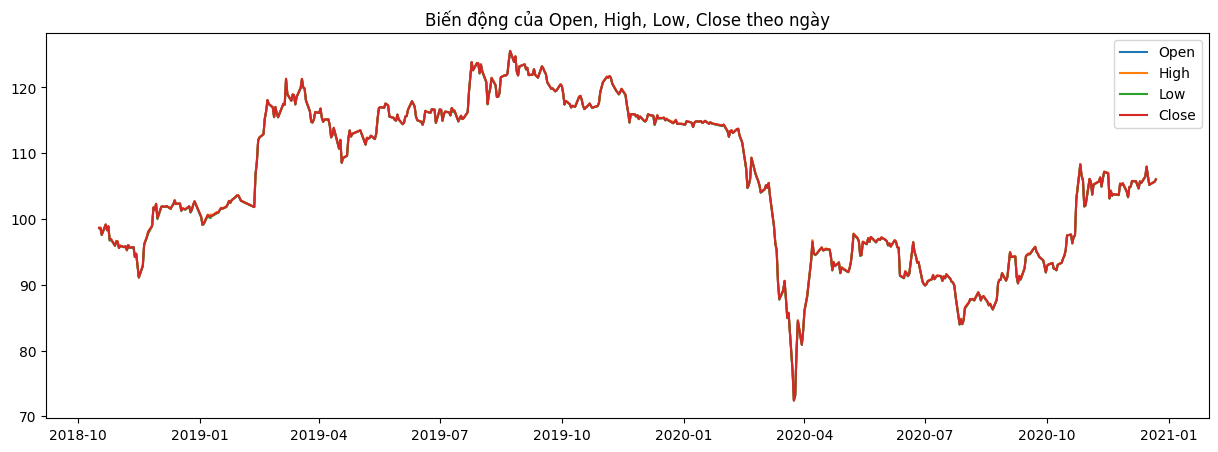

In [25]:
# Vẽ biểu đồ biến động của Open, High, Low, Close theo ngày
plt.figure(figsize=(15, 5))
plt.plot(vic_daily_avg.index, vic_daily_avg['Open'], label='Open')
plt.plot(vic_daily_avg.index, vic_daily_avg['High'], label='High')
plt.plot(vic_daily_avg.index, vic_daily_avg['Low'], label='Low')
plt.plot(vic_daily_avg.index, vic_daily_avg['Close'], label='Close')
plt.title('Biến động của Open, High, Low, Close theo ngày')
plt.legend()
plt.show()


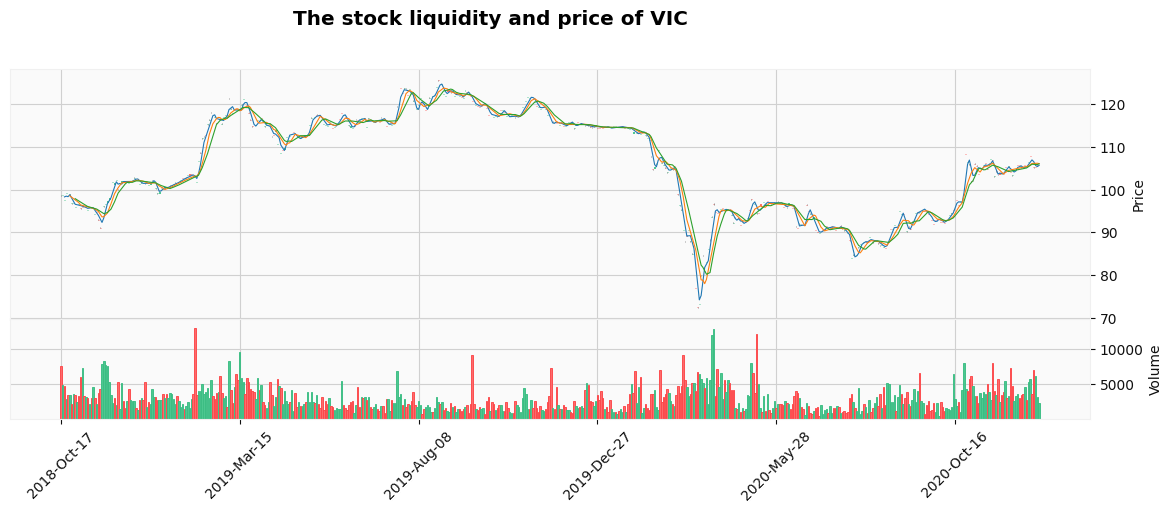

In [27]:
vic_df = vic_stock.copy()
vic_stock_dt = vic_df.set_index('Date/Time', inplace=True)
vic_daily_avg = vic_df.resample('D').mean().dropna()

# Vẽ biểu đồ nến
mpf.plot(
    vic_daily_avg,
    type='candle',
    volume=True,
    title="The stock liquidity and price of VIC",
    ylabel='Price',
    ylabel_lower='Volume',
    style='yahoo',
    mav=(3, 6, 9),
    figsize=(15, 5)
)


Dựa trên biểu đồ giá và thanh khoản của cổ phiếu VIC từ tháng 10/2018 đến cuối năm 2020, tôi có một số nhận xét sau:
- Xu hướng giá:

    - Trong năm 2018, giá cổ phiếu VIC biến động mạnh với nhiều đỉnh và đáy, không có xu hướng rõ ràng.
    - Từ đầu năm 2019 đến giữa năm 2020, giá cổ phiếu chịu áp lực giảm khá mạnh, có lúc giảm sâu xuống dưới mức 80.
    - Giai đoạn cuối năm 2020, giá cổ phiếu VIC hồi phục trở lại và tăng mạnh, vượt lên trên mức 100.

- Thanh khoản (Volume): Thanh khoản khá thấp vào đầu giai đoạn xem xét, tăng dần lên vào năm 2018 và đạt đỉnh cao vào đầu năm 2019.
Sau đó, thanh khoản có xu hướng giảm dần trở lại trong năm 2019 và nửa đầu năm 2020.
Vào cuối năm 2020, khi giá cổ phiếu VIC tăng trở lại, thanh khoản cũng tăng lên trở lại.

In [30]:
# Lấy danh sách chuỗi dương (bao gồm 0) và chuỗi âm
positive_streaks, negative_streaks = calculate_streaks(vic_daily_avg['Price_Change'])

# Tính toán trung bình độ dài chuỗi dương (bao gồm 0) và chuỗi âm
avg_positive_streak = sum(positive_streaks) / len(positive_streaks) if positive_streaks else 0
avg_negative_streak = sum(negative_streaks) / len(negative_streaks) if negative_streaks else 0

print(f"Trung bình số ngày có giá trị dương liên tiếp: {avg_positive_streak}")
print(f"Trung bình số ngày có giá trị âm liên tiếp: {avg_negative_streak}")

Trung bình số ngày có giá trị dương liên tiếp: 1.9930555555555556
Trung bình số ngày có giá trị âm liên tiếp: 1.8125


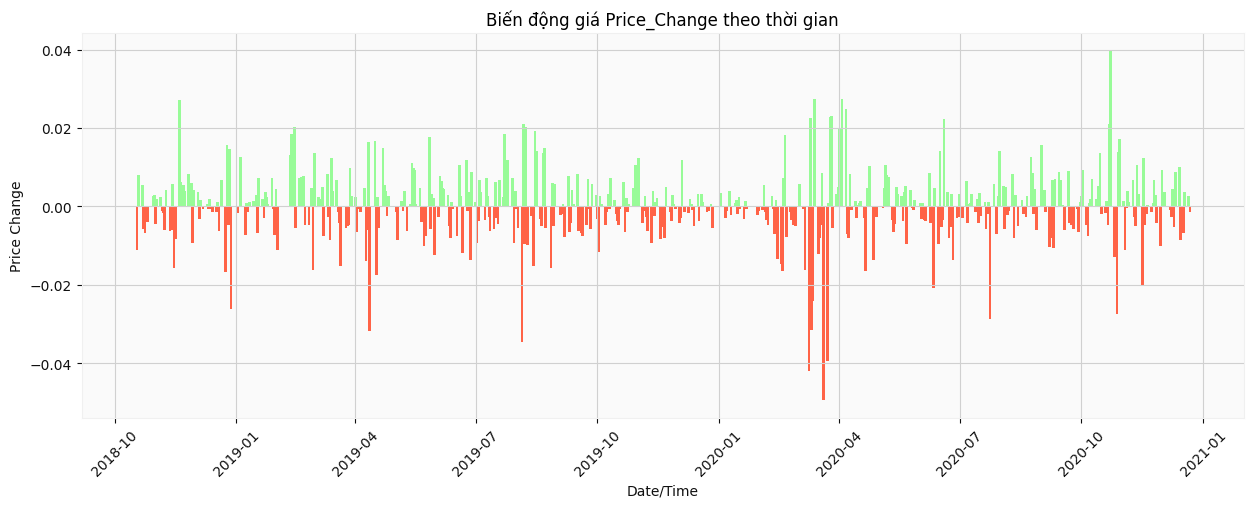

In [347]:
plt.figure(figsize=(15, 5))
plt.bar(vic_daily_avg.index,vic_daily_avg['Price_Change'],color=(vic_daily_avg['Price_Change'] > 0).map({True: 'palegreen',False: 'tomato'}),width=2)
plt.xlabel('Date/Time')
plt.ylabel('Price Change')
plt.title('Biến động giá Price_Change theo thời gian')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Qua biểu đồ biến động giá với (Biến động giá cổ phiếu = Giá cổ phiếu N (ngày) sau - Giá cổ phiếu hiện tại) có thể đưa ra một số nhận xét về xu hướng biến động giá của cổ phiếu như sau:
- Biến động giá cổ phiếu có xu hướng thay đổi tăng giảm liên tục tính theo ngày có xu hướng tăng liên tục từ 1 đến 2 ngày sau đó có xu hướng giảm dần trong khoảng thời gian từ 1 - 2 ngày tiếp theo và tăng dần lại. Biên độ giá trị biến động không quá cao từ 0 - 0.08 đa số dao động từ 0 đến 0.02. Do vậy, cổ phiếu này có khả năng biến động mạnh trong ngắn hạn, đợt biến động mạnh nhất và vào đầu đến giữa năm 2020.


#### **Phân tích xu hướng: Sử dụng Moving Average và Bollinger Bands**

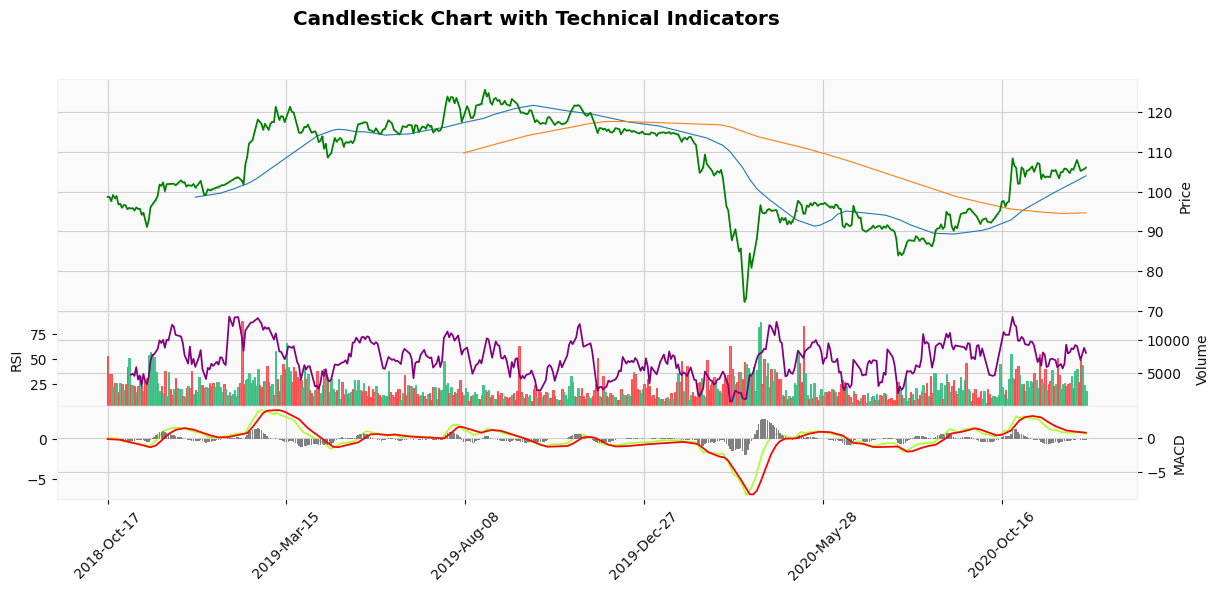

In [348]:
plot_stock_analysis(vic_stock)

Nhận xét về xu hướng biến động giá dựa trên RSI, MACD, MA50, MA200:
- RSI: Thể hiện nhiều biến động mạnh, thường xuyên vượt ngưỡng 70 (quá mua) và xuống dưới 30 (quá bán), cho thấy giai đoạn biến động lớn của giá cổ phiếu.
- MACD: Đường MACD và đường tín hiệu có nhiều lần giao cắt, báo hiệu các đợt đảo chiều xu hướng giá. Phần histogram của MACD cũng cho thấy sự thay đổi về mức độ biến động.
- MA50 và MA200:
Trong giai đoạn từ cuối 2017 đến đầu 2020, giá cổ phiếu biến động quanh MA50 và MA200 mà không có xu hướng rõ ràng. Tuy nhiên, từ giữa năm 2020, MA50 bắt đầu giảm dần xuống dưới MA200, báo hiệu xu hướng giảm giá trong ngắn hạn.


#### **Backtest chiến lược để xác định lợi nhuận và tỷ suất lợi nhuận: Sử dụng Bollinger Bands, Keltner Channel, RSI**

In [349]:
vic_df = vic_stock.copy()
vic_df.set_index('Date/Time', inplace=True)

In [350]:
vic_df['upper_bb'], vic_df['middle_bb'], vic_df['lower_bb'] = get_bb(vic_df['Close'], 20) 
vic_df['kc_middle'], vic_df['kc_upper'], vic_df['kc_lower'] = get_kc(vic_df['High'], vic_df['Low'], vic_df['Close'], 20, 2, 10)

In [351]:
vic_df['rsi_14'] = get_rsi(pnj_df['Close'], 14)
vic_df = vic_df.dropna()
buy_price, sell_price, bb_kc_rsi_signal = bb_kc_rsi_strategy(vic_df['Close'], vic_df['upper_bb'], vic_df['lower_bb'], vic_df['kc_upper'], vic_df['kc_lower'], vic_df['rsi_14'])

In [352]:
strategy = generate_strategy(vic_df,bb_kc_rsi_signal)
total_investment_ret, profit_percentage = calculate_investment_returns(vic_df, strategy, investment_value=100000)
print(cl('Profit gained from the BB KC RSI strategy by investing 100000 VND in VIC: {}'.format(total_investment_ret), attrs=['bold']))
print(cl('Profit percentage of the BB KC RSI strategy : {}%'.format(profit_percentage), attrs=['bold']))

Profit gained from the BB KC RSI strategy by investing 100000 VND in VIC: 2448.7
Profit percentage of the BB KC RSI strategy : 2%


## **Phân tích tổng quan chung và đối chối cho 4 mã chứng khoán FPT, PNJ, MSN, VIC**

In [26]:
data.describe()

,Open,High,Low,Close,Volume,Open Interest,Price_Change
count,459335.000000,459335.000000,459335.000000,459335.000000,4.593350e+05,459335.0,459334.000000
mean,74.545826,74.626579,74.481065,74.546183,4.909390e+03,0.0,0.000071
std,23.023346,23.038201,23.011619,23.024380,1.902104e+04,0.0,33.539329
min,30.250000,30.250000,30.220000,30.250000,1.000000e+00,0.0,-88.860000
25%,54.190000,54.250000,54.150000,54.190000,3.600000e+02,0.0,-25.490000
50%,75.730000,75.920000,75.600000,75.720000,1.500000e+03,0.0,0.000000
75%,90.100000,90.200000,90.000000,90.100000,4.920000e+03,0.0,25.500000
max,126.100000,126.500000,126.100000,126.500000,3.300680e+06,0.0,88.900000


In [27]:
daily_avg = data.groupby('Date').mean()
daily_avg.head()

,Open,High,Low,Close,Volume,Open Interest,Price_Change
Date,,,,,,,
2017-12-25,73.750877,73.762281,73.739474,73.748246,1819.035088,0.0,0.009735
2017-12-26,74.891111,74.908889,74.874074,74.891111,2990.444444,0.0,0.009630
2017-12-27,75.285401,75.308029,75.258394,75.285401,3780.437956,0.0,-0.003650
2017-12-28,75.181982,75.207207,75.173874,75.200000,3396.666667,0.0,0.006306
2017-12-29,76.541463,76.563415,76.509756,76.534146,5533.658537,0.0,0.024390


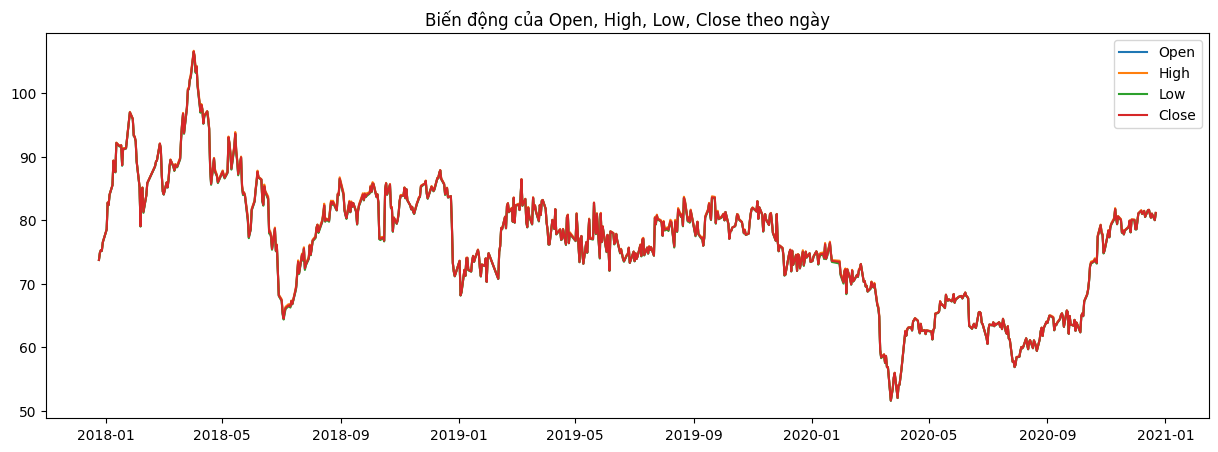

In [28]:
# Vẽ biểu đồ biến động của Open, High, Low, Close theo ngày
plt.figure(figsize=(15, 5))
plt.plot(daily_avg.index, daily_avg['Open'], label='Open')
plt.plot(daily_avg.index, daily_avg['High'], label='High')
plt.plot(daily_avg.index, daily_avg['Low'], label='Low')
plt.plot(daily_avg.index, daily_avg['Close'], label='Close')
plt.title('Biến động của Open, High, Low, Close theo ngày')
plt.legend()
plt.grid(True)
plt.show()

Dựa trên đồ thị biến động của Open, High, Low, Close theo ngày cho các mã cổ phiếu, tôi có một số nhận xét như sau:

- Xu hướng chung trong khoảng thời gian từ đầu năm 2018 đến cuối năm 2020 là biến động mạnh với nhiều đỉnh và đáy, cho thấy thị trường khá biến động và không ổn định trong giai đoạn này.
- Từ giữa năm 2020 đến đầu năm 2021, đồ thị cho thấy xu hướng tăng giá rõ rệt, điều này phản ánh tình hình thị trường khá tích cực trong giai đoạn này.
- Về bối cảnh hiện tại theo đường biểu diễn giá đóng cửa (Close) cuối cùng, ta thấy giá đang ở mức khá cao so với giai đoạn trước đó, cho thấy tình hình thị trường đang khả quan.
Tuy nhiên, nếu xem xét kỹ hơn, ta cũng thấy có nhiều đỉnh và đáy xảy ra trong quá khứ gần đây, điều này cảnh báo rằng thị trường vẫn còn biến động và khó đoán trước xu hướng trong tương lai gần.

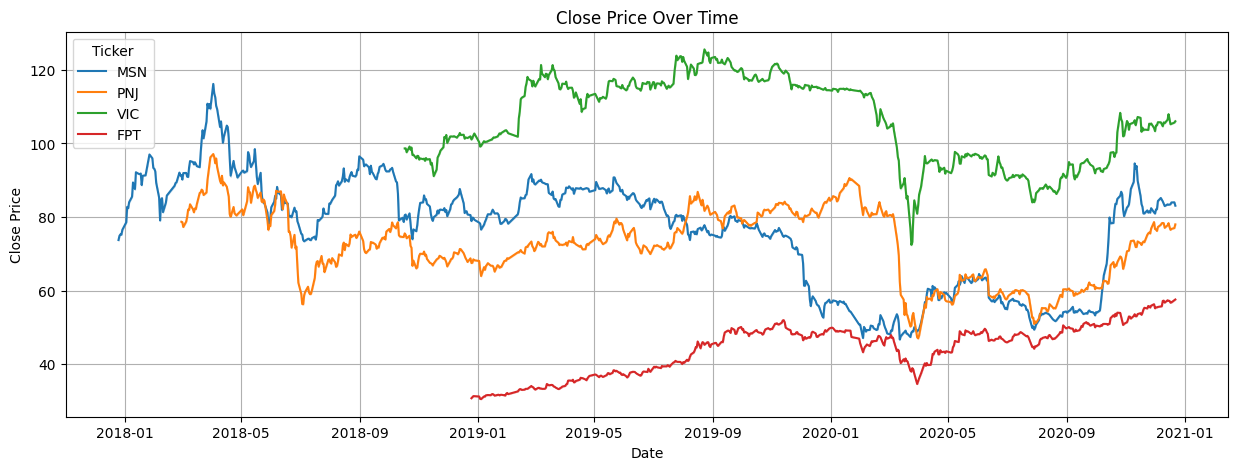

In [30]:
# Vẽ biểu đồ đường cho giá Open, High, Low, Close của các ticker
plt.figure(figsize=(15, 5))

tickers = data['Ticker'].unique()
for ticker in tickers:
    sns.lineplot(data=data[data['Ticker'] == ticker], x='Date', y='Close', label=ticker)
#.plot(daily_avg.index, daily_avg['Close'], label='Avg_Close')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(title='Ticker')
plt.grid(True)
plt.show()

Qua biểu đồ thể hiện biến động giá trị cổ phiếu giá đóng 'Close', nhận thấy rằng: VIC là mã cổ phiếu có giá trị cao hơn so với 3 mã còn lại và FPT là cổ phiêú có giá trị nhỏ nhất. Sự biến động thòi gian được xét của MSN và PNJ dài hơn FPT và VIC trong từng khoảng thời gian các mã cổ phiếu biến động như sau:
- MSN: Có biến động lớn nhất trong giai đoạn này, đặc biệt là sự tăng mạnh từ đầu năm 2018 đến giữa năm 2018, sau đó là sự giảm mạnh đến cuối năm 2020.
Sau giai đoạn giảm mạnh, cổ phiếu MSN bắt đầu phục hồi vào cuối năm 2020.
- PNJ: Cũng trải qua sự biến động đáng kể, nhưng ít hơn so với MSN. Giá cổ phiếu PNJ có xu hướng giảm từ đầu năm 2018 đến cuối năm 2020, với một số giai đoạn tăng giá ngắn hạn.
Bắt đầu phục hồi nhẹ vào cuối năm 2020.
- FPT: Có xu hướng tăng ổn định hơn so với các cổ phiếu khác. Tăng trưởng dần từ đầu năm 2018 đến cuối năm 2020, với ít biến động mạnh. Cho thấy sự ổn định và tăng trưởng bền vững.
- VIC: Giá cổ phiếu VIC cũng có sự biến động nhưng ở mức trung bình so với MSN và PNJ. Tăng mạnh từ giữa năm 2018 đến đầu năm 2019, sau đó giữ mức giá cao tương đối ổn định cho đến đầu năm 2020.
Sự sụt giảm mạnh vào đầu năm 2020, sau đó phục hồi nhanh chóng và duy trì ở mức cao đến cuối năm 2020.

Tuy có sự biến động khác nhau nhưng với các khoảng thời gian giống nhau đều có xu thế tăng giảm khá là tương đồng nhau phản ánh bối cảnh kinh tế hiện tại.

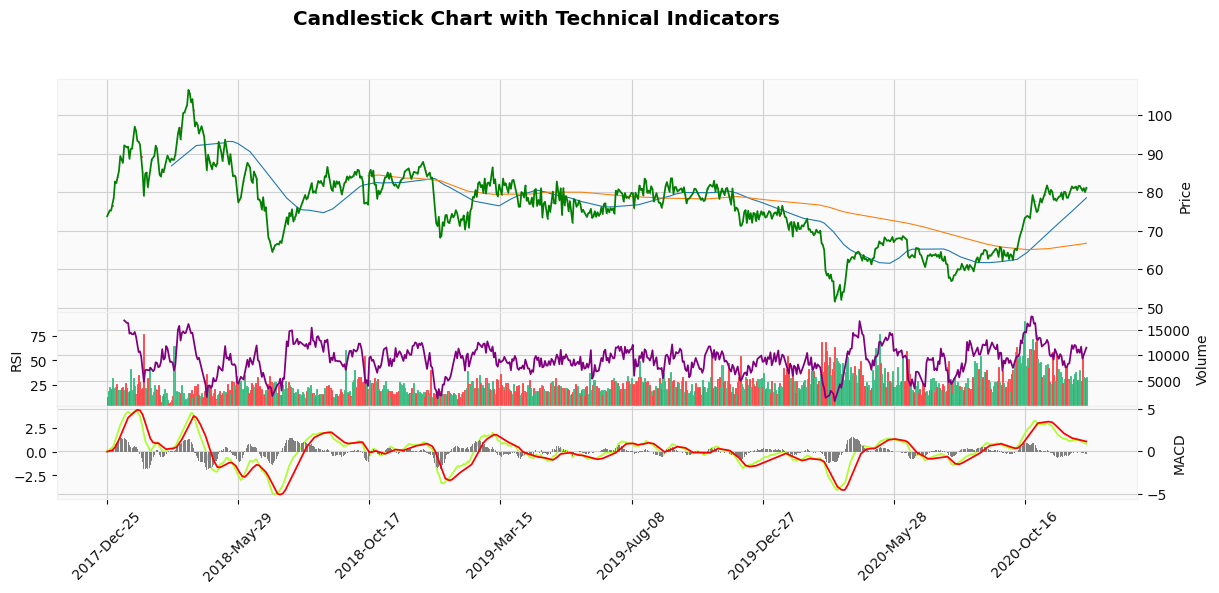

In [ ]:
plot_stock_analysis(data)

Dựa trên biểu đồ cung cấp, có thể nhận xét ngắn gọn về xu thế biến động của các chỉ số như sau:

- Khối lượng giao dịch (Volume): Khối lượng giao dịch biến động mạnh, không có xu hướng rõ ràng, với một số đỉnh khối lượng cao hơn vào các khoảng thời gian khác nhau. Điều này cho thấy sự quan tâm của nhà đầu tư dao động khá nhiều trong giai đoạn này.
Chỉ số RSI (Relative Strength Index):

- Chỉ số RSI dao động trong khoảng 30-70 phần lớn thời gian, chỉ ra rằng cổ phiếu thường không quá mua (overbought) hay quá bán (oversold). Tuy nhiên, có một số điểm vượt ra ngoài ngưỡng này, chỉ ra những thời điểm cực điểm.
- Chỉ số MACD (Moving Average Convergence Divergence): MACD và đường tín hiệu (màu đỏ) có nhiều lần cắt nhau, cho thấy các tín hiệu mua và bán thường xuyên xuất hiện, phản ánh sự biến động ngắn hạn của giá cổ phiếu.
- Đường trung bình động MA50 (màu xanh lam) và MA200 (màu cam):
MA50 (màu xanh lam): Theo sát biến động giá hơn, thường phản ánh các xu hướng ngắn hạn.
MA200 (màu cam): Di chuyển chậm hơn, phản ánh xu hướng dài hạn.
Khi MA50 cắt lên trên MA200 (Golden Cross) vào khoảng giữa năm 2020, đây là tín hiệu tăng giá. Ngược lại, khi MA50 cắt xuống dưới MA200 (Death Cross), nó là tín hiệu giảm giá, điều này có thể được nhìn thấy vào khoảng cuối năm 2018.

Tổng quan, giai đoạn từ cuối năm 2017 đến cuối năm 2019 là xu hướng giảm giá, trong khi từ đầu năm 2020 đến cuối năm 2020, giá cổ phiếu có xu hướng phục hồi và tăng trở lại. Các chỉ số RSI và MACD cho thấy nhiều biến động và tín hiệu mua/bán ngắn hạn. Khối lượng giao dịch dao động không đều, và các đường MA50 và MA200 cung cấp các tín hiệu dài hạn về xu hướng thị trường.







In [353]:
stock_df = data.copy()
stock_df.set_index('Date/Time', inplace=True)
stock_daily_avg = stock_df.resample('D').mean().dropna()

In [354]:
# Lấy danh sách chuỗi dương (bao gồm 0) và chuỗi âm
positive_streaks, negative_streaks = calculate_streaks(stock_daily_avg['Price_Change'])

# Tính toán trung bình độ dài chuỗi dương (bao gồm 0) và chuỗi âm
avg_positive_streak = sum(positive_streaks) / len(positive_streaks) if positive_streaks else 0
avg_negative_streak = sum(negative_streaks) / len(negative_streaks) if negative_streaks else 0

print(f"Trung bình số ngày có giá trị dương liên tiếp: {avg_positive_streak}")
print(f"Trung bình số ngày có giá trị âm liên tiếp: {avg_negative_streak}")

Trung bình số ngày có giá trị dương liên tiếp: 1.534412955465587
Trung bình số ngày có giá trị âm liên tiếp: 1.4939271255060729


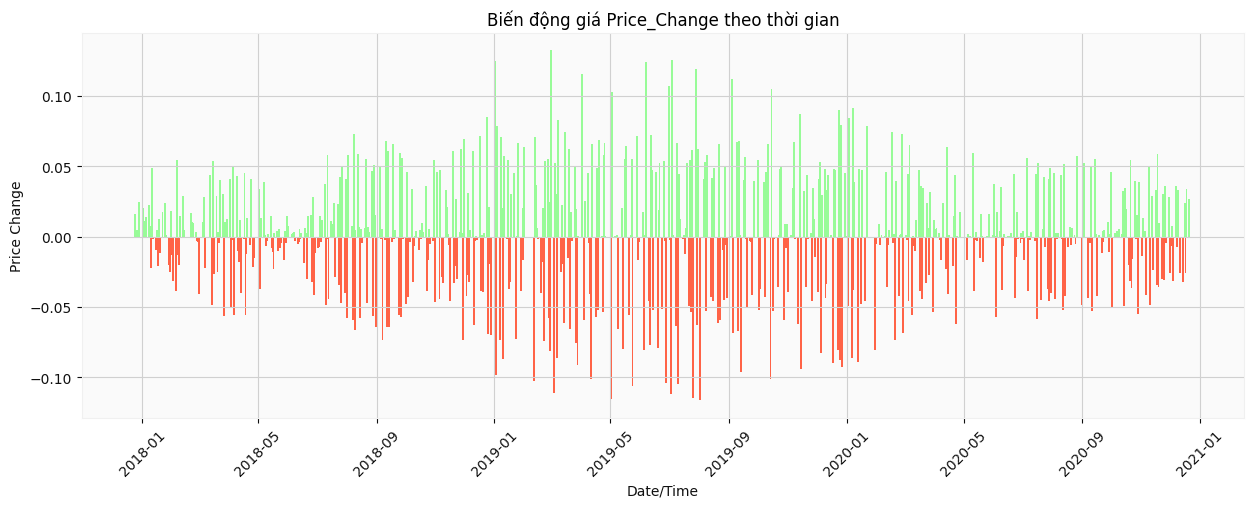

In [355]:
plt.figure(figsize=(15, 5))
plt.bar(stock_daily_avg.index,stock_daily_avg['Price_Change'],color=(stock_daily_avg['Price_Change'] > 0).map({True: 'palegreen',False: 'tomato'}),width=2)
plt.xlabel('Date/Time')
plt.ylabel('Price Change')
plt.title('Biến động giá Price_Change theo thời gian')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Qua biểu đồ biến động giá có thể đưa ra một số nhận xét về xu hướng biến động giá của cổ phiếu như sau: 
- Biến động giá cổ phiếu có xu hướng thay đổi tăng giảm liên tục tính theo ngày có xu hướng tăng liên tục trong khoảng thời gian từ 1 đến 2 ngày sau đó có xu hướng giảm dần trong khoảng thời gian từ 1 - 2 ngày tiếp theo và tăng dần lại.
- Biên độ giá trị biến động cổ phiếu này có khả năng biến động mạnh trong ngắn hạn (có thể từ lên cao và giảm mạnh xuống liền ngay ngày sau đó), biến động mạnh ở khoảng thời gian từ cuối 2018 đến gần giữa năm 2020.

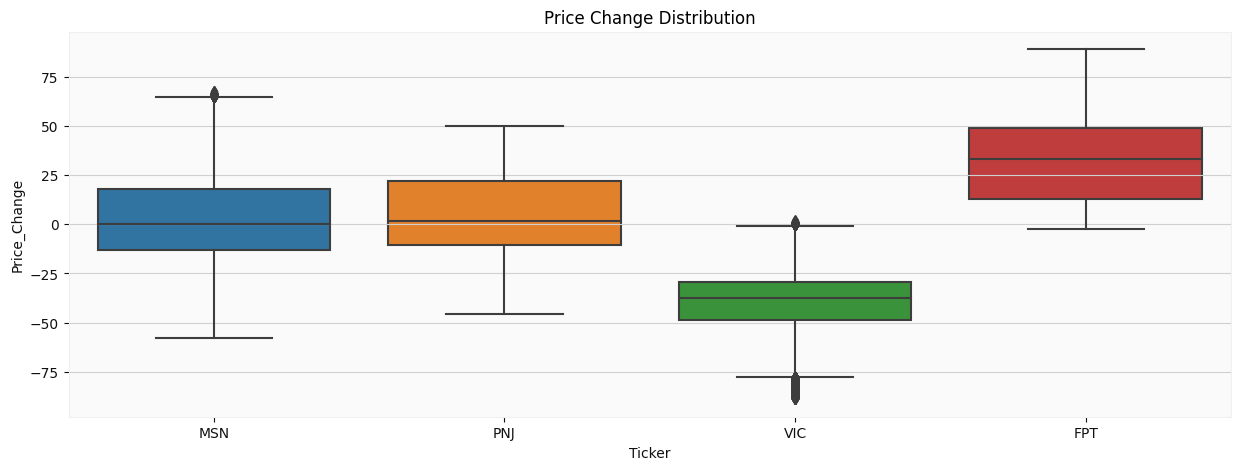

In [356]:
# Vẽ biểu đồ hộp cho Price Change của các ticker
plt.figure(figsize=(15, 5))
sns.boxplot(data=data, x='Ticker', y='Price_Change')
plt.title('Price Change Distribution')
plt.show()


- MSN: Giá cổ phiếu có sự biến động khá lớn, với khoảng dao động rộng từ -50 đến 50 và một vài điểm dữ liệu ngoại lệ.

- PNJ: Biến động giá khá ổn định, tập trung quanh mức trung bình với phạm vi dao động từ -50 đến 50, và ít điểm dữ liệu ngoại lệ.

- FPT: Biến động giá chủ yếu dương, dao động từ khoảng -25 đến 50, cho thấy xu hướng tăng trưởng tích cực.

- VIC: Biến động giá nhỏ nhất trong nhóm, dao động chủ yếu từ -25 đến 25, cho thấy sự ổn định tương đối.

#### **Ảnh hưởng của bối cảnh kinh tế xã hội hiện thời với các lĩnh vực hoạt động của các công ty ảnh hưởng đến xu thế biến động giá trị cổ phiếu của MSN, FPT, PNJ và VIC:**
- Cuộc Chiến Thương Mại Mỹ-Trung (2018):
Tác động: Cuộc chiến thương mại Mỹ-Trung bắt đầu vào năm 2018 đã gây ra sự bất ổn lớn trên thị trường toàn cầu. Điều này dẫn đến sự lo lắng về tăng trưởng kinh tế toàn cầu và ảnh hưởng đến thị trường chứng khoán của nhiều quốc gia, bao gồm cả Việt Nam.
Biểu đồ: Các cổ phiếu như MSN và PNJ đã trải qua sự biến động mạnh vào khoảng thời gian cuối năm 2018, phản ánh sự ảnh hưởng từ cuộc chiến thương mại này.
- Đại Dịch COVID-19 (2020):
Tác động: Đại dịch COVID-19 bùng phát vào đầu năm 2020 đã gây ra sự sụt giảm đột ngột trong hoạt động kinh tế toàn cầu, dẫn đến sự hoảng loạn trên thị trường chứng khoán. Tuy nhiên, các biện pháp kích thích kinh tế và chính sách tiền tệ nới lỏng từ các ngân hàng trung ương đã giúp phục hồi thị trường trong nửa cuối năm 2020.
Biểu đồ: Tất cả các mã cổ phiếu (FPT, PNJ, MSN, VIC) đều cho thấy sự sụt giảm đáng kể vào đầu năm 2020 nhưng sau đó đã phục hồi mạnh mẽ vào cuối năm.
- Chính Sách Tiền Tệ và Kích Thích Kinh Tế:
Tác động: Các chính phủ và ngân hàng trung ương trên toàn thế giới đã thực hiện các biện pháp kích thích kinh tế mạnh mẽ, bao gồm giảm lãi suất và các gói hỗ trợ tài chính, để đối phó với tác động kinh tế của đại dịch. Điều này đã giúp tạo ra một môi trường tài chính dễ chịu và thúc đẩy sự phục hồi của thị trường chứng khoán.
Biểu đồ: Sự phục hồi mạnh mẽ của các cổ phiếu vào nửa cuối năm 2020 có thể thấy rõ, đặc biệt là với VIC và FPT, phản ánh sự tác động của các chính sách kích thích kinh tế.
- Sự Phát Triển của Các Ngành Công Nghiệp Chính:
Tác động: Các ngành công nghiệp chính như công nghệ thông tin (FPT), tiêu dùng và bán lẻ (PNJ), thực phẩm và nông sản (MSN), bất động sản (VIC) đều có những biến động theo xu hướng chung của thị trường nhưng cũng phản ánh sự phát triển nội tại của từng ngành.
Biểu đồ: Ví dụ, FPT thể hiện sự ổn định và tăng trưởng, phản ánh nhu cầu ngày càng tăng về công nghệ thông tin và dịch vụ viễn thông trong thời kỳ đại dịch.


# **Data Preprocessing**

In [ ]:
df_stock = data.copy()
df_stock.set_index('Date/Time', inplace=True)

In [ ]:
# Tính toán các chỉ báo kỹ thuật
def compute_RSI(series, period=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def compute_MACD(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    macd_signal = macd.ewm(span=signal_window, adjust=False).mean()
    macd_hist = macd - macd_signal
    return macd, macd_signal, macd_hist

In [ ]:
df_stock['EMA_9'] = df_stock['Close'].ewm(9).mean().shift()
df_stock['SMA_3'] = df_stock['Close'].rolling(3).mean().shift()
df_stock['MA50'] = df_stock['Close'].rolling(window=50).mean()
df_stock['MA200'] = df_stock['Close'].rolling(window=200).mean()
df_stock['RSI'] = compute_RSI(df_stock['Close'])
df_stock['MACD'], df_stock['MACD_Signal'], df_stock['MACD_Hist'] = compute_MACD(df_stock['Close'])
df_stock['Pre_Price_Change'] = df_stock['Price_Change'].shift(1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_stock['Ticker_encoded'] = label_encoder.fit_transform(df_stock['Ticker'])

In [ ]:
df_stock.dropna(inplace=True)

In [ ]:
df_stock = df_stock.drop(columns=['Date','Ticker'], axis=1)

In [ ]:
df_stock

,Open,High,Low,Close,Volume,Open Interest,Price_Change,EMA_9,SMA_3,MA50,MA200,RSI,MACD,MACD_Signal,MACD_Hist,Pre_Price_Change,Ticker_encoded
Date/Time,,,,,,,,,,,,,,,,,
2017-12-26 13:11:00,74.8,74.8,74.8,74.8,1400,0,0.0,74.935564,74.833333,74.906,74.2305,33.333333,-0.029543,-0.002788,-0.026755,0.0,1
2017-12-26 13:12:00,74.8,74.8,74.8,74.8,80,0,0.2,74.922007,74.800000,74.912,74.2390,33.333333,-0.035205,-0.009271,-0.025933,0.0,1
2017-12-26 13:16:00,74.9,75.0,74.9,75.0,6090,0,0.0,74.909807,74.800000,74.924,74.2490,60.000000,-0.023285,-0.012074,-0.011211,0.2,1
2017-12-26 13:17:00,75.0,75.0,75.0,75.0,2000,0,0.0,74.918826,74.866667,74.930,74.2565,60.000000,-0.013681,-0.012395,-0.001286,0.0,1
2017-12-26 13:23:00,74.8,75.0,74.8,75.0,4580,0,-0.1,74.926943,74.933333,74.936,74.2660,50.000000,-0.006000,-0.011116,0.005116,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22 14:27:00,82.8,82.8,82.8,82.8,300,0,-24.7,78.544402,73.033333,81.346,81.2930,53.872687,-1.497655,-0.817214,-0.680441,24.6,1
2020-12-22 14:29:00,58.1,58.1,58.1,58.1,2500,0,0.0,78.969962,73.033333,80.390,81.2960,46.127313,-2.975277,-1.248827,-1.726451,-24.7,0
2020-12-22 14:46:00,58.1,58.1,58.1,58.1,11170,0,20.2,76.882966,66.366667,79.988,81.1960,46.802418,-4.099052,-1.818872,-2.280180,0.0,0


In [ ]:
def preprocess_data(data):
    df_stock = data.copy()
    df_stock.set_index('Date/Time', inplace=True)

    # Thêm các cột chỉ số kỹ thuật vào DataFrame
    #df_stock['EMA_9'] = df_stock['Close'].ewm(9).mean().shift()
    #df_stock['MA3'] = df_stock['Close'].rolling(window=3).mean()
    df_stock['MA50'] = df_stock['Close'].rolling(window=50).mean()
    df_stock['MA200'] = df_stock['Close'].rolling(window=200).mean()
    df_stock['RSI'] = compute_RSI(df_stock['Close'])
    df_stock['MACD'], df_stock['MACD_Signal'], df_stock['MACD_Hist'] = compute_MACD(df_stock['Close'])
    df_stock['Pre_Price_Change'] = df_stock['Price_Change'].shift(1)

    # Sử dụng LabelEncoder để mã hóa cột 'Ticker'
    label_encoder = LabelEncoder()
    df_stock['Ticker_encoded'] = label_encoder.fit_transform(df_stock['Ticker'])

    # Loại bỏ các hàng chứa giá trị NaN
    df_stock.dropna(inplace=True)
    df_stock = df_stock.drop(columns=['Date', 'Ticker'], axis=1)
    X = df_stock.drop(columns=['Price_Change'], axis=1)
    y = df_stock['Price_Change']

    return X, y

# **Prediction Model**

Thực hiện các model prediction trên data gộp sau đó lựa chọn model ổn định và hiệu quả nhất để dự đoán biến động giá cho 4 mã cổ phiếu FPT, PNJ, VIC và MSN.

## **1. Linear Rgression**

In [ ]:
X = df_stock.drop(columns=['Price_Change'], axis=1)
y = df_stock['Price_Change']

In [ ]:
# Chuyển đổi chuỗi ngày tháng sang kiểu datetime
split_date = pd.to_datetime("2020-06-01")

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo ngày
train_X = X[X.index <= split_date]
test_X = X[X.index > split_date]
train_y = y[y.index <= split_date]
test_y = y[y.index > split_date]

In [ ]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 339595 entries, 2017-12-26 13:11:00 to 2020-05-29 14:46:00
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Open              339595 non-null  float64
 1   High              339595 non-null  float64
 2   Low               339595 non-null  float64
 3   Close             339595 non-null  float64
 4   Volume            339595 non-null  int64  
 5   Open Interest     339595 non-null  int64  
 6   EMA_9             339595 non-null  float64
 7   SMA_3             339595 non-null  float64
 8   MA50              339595 non-null  float64
 9   MA200             339595 non-null  float64
 10  RSI               339595 non-null  float64
 11  MACD              339595 non-null  float64
 12  MACD_Signal       339595 non-null  float64
 13  MACD_Hist         339595 non-null  float64
 14  Pre_Price_Change  339595 non-null  float64
 15  Ticker_encoded    339595 non-null 

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_X.values)
X_test_scaled = scaler.transform(test_X)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(train_X, train_y)

In [ ]:
# Dự đoán giá trị trên tập kiểm tra
y_pred = pd.Series(model.predict(test_X), index=test_X.index)

# Đánh giá mô hình
mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')


Mean Squared Error (MSE): 251.3528289615925
Mean Absolute Error (MAE): 13.183545835985099
R² Score: 0.6564364248583283


## **2. XGBoost**

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = pd.Series(model.predict(test_X), index=test_X.index)

# Đánh giá mô hình
mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 257.2134856589709
Mean Absolute Error (MAE): 13.182236150709603
R² Score: 0.6484257405308527


## **3. LSTM**

In [ ]:
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

In [ ]:
timesplit= TimeSeriesSplit(n_splits=60)
for train_index, test_index in timesplit.split(X_scale):
        X_train, X_test = X_scale[:len(train_index)],X_scale[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = y[:len(train_index)].ravel(), y[len(train_index): (len(train_index)+len(test_index))].ravel()

In [ ]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
lstm = Sequential()
lstm.add(LSTM(50, return_sequences=True, input_shape=(1, trainX.shape[1]), activation='relu'))
lstm.add(LSTM(50, return_sequences=False))
lstm.add(Dense(25))
lstm.add(Dense(1))

lstm.compile(optimizer='adam', loss='mse')
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             13000     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 34501 (134.77 KB)
Trainable params: 34501 (134.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = lstm.fit(X_train, y_train, epochs=30, batch_size=64,verbose=1, shuffle=False)

Epoch 1/30
7056/7056 [==============================] - 53s 7ms/step - loss: 405.0415
Epoch 2/30
7056/7056 [==============================] - 47s 7ms/step - loss: 402.7052
Epoch 3/30
7056/7056 [==============================] - 48s 7ms/step - loss: 402.5480
Epoch 4/30
7056/7056 [==============================] - 47s 7ms/step - loss: 402.2682
Epoch 5/30
7056/7056 [==============================] - 47s 7ms/step - loss: 401.9025
Epoch 6/30
7056/7056 [==============================] - 48s 7ms/step - loss: 401.6955
Epoch 7/30
7056/7056 [==============================] - 47s 7ms/step - loss: 401.4072
Epoch 8/30
7056/7056 [==============================] - 47s 7ms/step - loss: 401.2017
Epoch 9/30
7056/7056 [==============================] - 48s 7ms/step - loss: 400.7845
Epoch 10/30
7056/7056 [==============================] - 47s 7ms/step - loss: 400.5248
Epoch 11/30
7056/7056 [==============================] - 49s 7ms/step - loss: 400.4213
Epoch 12/30
7056/7056 [=============================

In [ ]:
y_pred= lstm.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')

236/236 [==============================] - 2s 4ms/step
Mean squared error: 15.97023041450881
R2 score: 0.6758414756490454


## **4. ARIMA**

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

<Axes: ylabel='Density'>

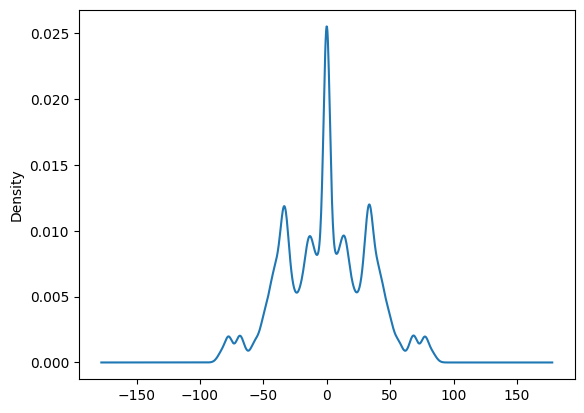

In [ ]:
df_stock['Price_Change'].plot(kind='kde')

In [ ]:
X = pd.DataFrame(df_stock['Price_Change'])

In [ ]:
# Chuyển đổi chuỗi ngày tháng sang kiểu datetime
split_date = pd.to_datetime("2020-06-01")

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo ngày
train_data = X[X.index <= split_date]
test_data = X[X.index > split_date]

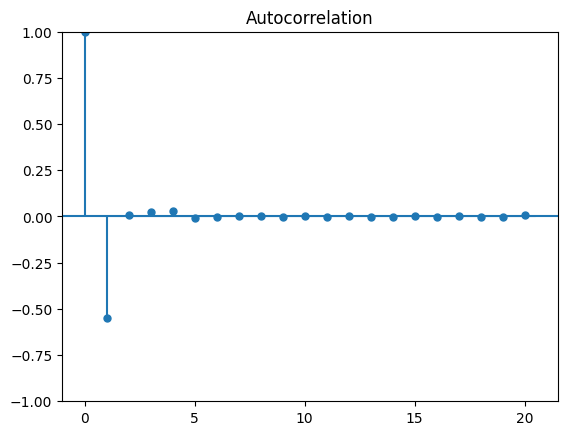

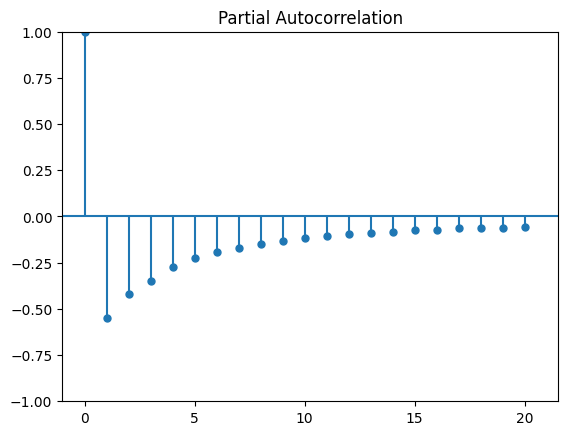

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_stock['Price_Change'], lags=20)
plot_pacf(df_stock['Price_Change'], lags=20)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3389177.010, Time=2.41 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3266756.457, Time=2.84 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=14.46 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3199777.127, Time=6.19 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3156105.243, Time=5.38 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=73.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=50.75 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3156107.243, Time=10.85 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 175.188 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:               339595
Model:               SARIMAX(3, 0, 0)   Log Likelihood            -1578048.622
Date:                Tue, 28 May 2024   AIC                        3156105.243
Time:                        1

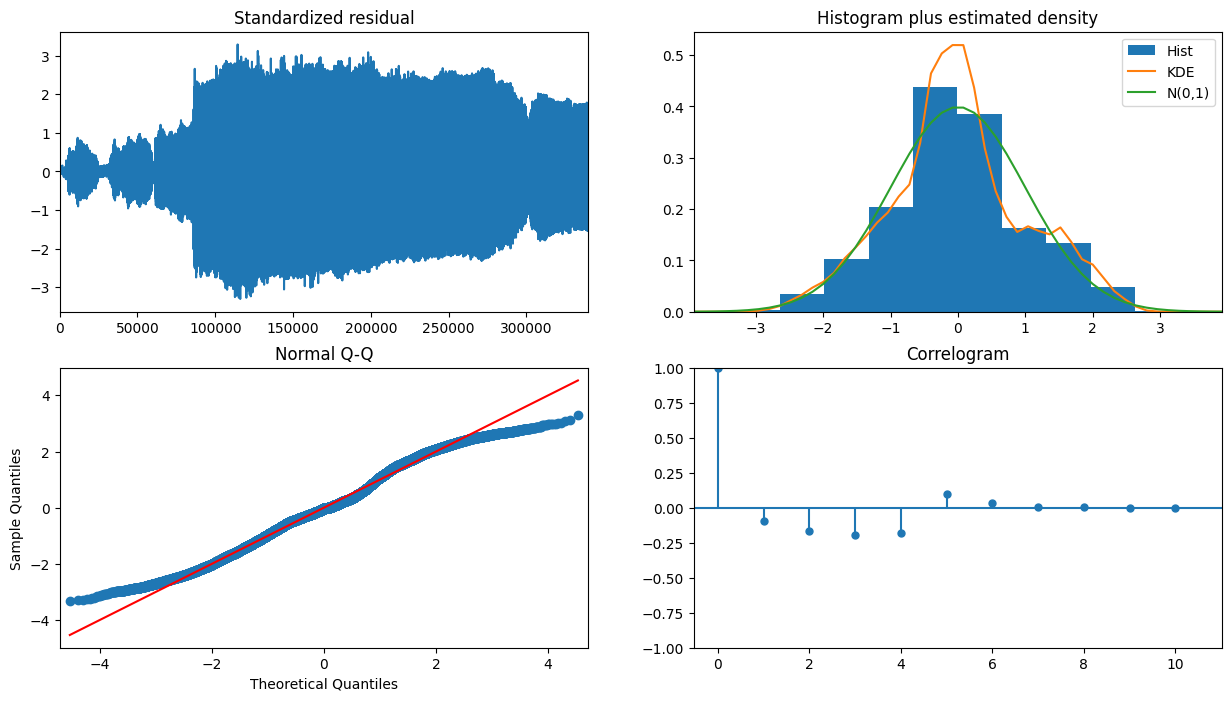

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(train_data, order=(3,0,0))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           Price_Change   No. Observations:               339595
Model:                 ARIMA(3, 0, 0)   Log Likelihood            -1578048.622
Date:                Tue, 28 May 2024   AIC                        3156107.243
Time:                        16:00:41   BIC                        3156160.921
Sample:                             0   HQIC                       3156122.687
                             - 339595                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.855e-05      0.015     -0.001      0.999      -0.029       0.029
ar.L1         -0.9299      0.002   -588.450      0.000      -0.933      -0.927
ar.L2         -0.6951      0.002   -380.928      0.0

In [ ]:
# Dự báo
forecast = model_fit.forecast(steps=len(test_data))

# Chuyển đổi dự báo thành dataframe
forecast = pd.DataFrame(forecast.values, index=test_data.index, columns=['Forecast'])

In [ ]:
forecast.isnull().sum()

Forecast    0
dtype: int64

In [ ]:
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print('Test RMSE: {:.2f}'.format(rmse))

r2 = r2_score(test_data, forecast)
print("R^2 Score:", r2)

Test RMSE: 27.05
R^2 Score: -5.068601558910757e-06


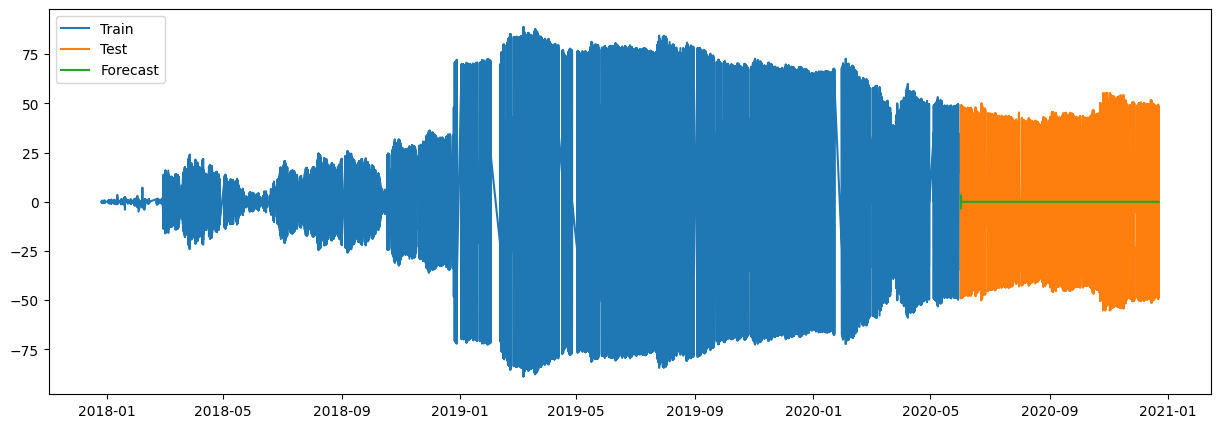

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(train_X, label='Train')
plt.plot(test_X, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend(loc='upper left')
plt.show()


## **Model LSTM forecasting Price Change for FPT, PNJ, MSN, VIC.**

In [ ]:
def linear_regression_model(X, y, split_date_str):
    # Convert split date string to datetime
    split_date = pd.to_datetime(split_date_str)

    # Split data into training and testing sets
    train_X = X[X.index <= split_date]
    test_X = X[X.index > split_date]
    train_y = y[y.index <= split_date]
    test_y = y[y.index > split_date]

    # Scaling the features
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(train_X.values)
    X_test_scaled = scaler.transform(test_X)

    # Training the model
    model = LinearRegression().fit(X_train_scaled, train_y)

    # Predicting on the test set
    y_pred = pd.Series(model.predict(X_test_scaled), index=test_y.index)

    # Model evaluation
    mse = mean_squared_error(test_y, y_pred)
    r2 = r2_score(test_y, y_pred)
    mae = mean_absolute_error(test_y, y_pred)

    # Print evaluation metrics
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R² Score: {r2}')

    return model, y_pred, mse, mae, r2

In [ ]:
def train_lstm(X, y):
    # Chuẩn hóa dữ liệu
    scaler = MinMaxScaler()
    X_scale = scaler.fit_transform(X)

    # Chia dữ liệu bằng TimeSeriesSplit
    timesplit = TimeSeriesSplit(n_splits=60)
    for train_index, test_index in timesplit.split(X_scale):
        X_train, X_test = X_scale[:len(train_index)], X_scale[len(train_index): (len(train_index) + len(test_index))]
        y_train, y_test = y[:len(train_index)].ravel(), y[len(train_index): (len(train_index) + len(test_index))].ravel()

    # Chia dữ liệu train thành train và validation
    train_size = int(len(X_train) * 0.9)
    X_train, X_val = X_train[:train_size], X_train[train_size:]
    y_train, y_val = y_train[:train_size], y_train[train_size:]

    trainX = np.array(X_train)
    valX = np.array(X_val)
    testX = np.array(X_test)

    X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_val = valX.reshape(X_val.shape[0], 1, valX.shape[1])
    X_test = testX.reshape(X_test.shape[0], 1, testX.shape[1])

    # Xây dựng mô hình LSTM
    lstm = Sequential()
    lstm.add(LSTM(64, return_sequences=False, input_shape=(1, trainX.shape[1]), activation='linear'))
    lstm.add(Dense(32))
    lstm.add(Dense(1))
    # Choose the optimizer
    lstm.compile(optimizer='adam', loss='mse')
    lstm.summary()

    # Huấn luyện mô hình với tập validation
    history = lstm.fit(X_train, y_train, epochs=30, batch_size=128, shuffle=False, validation_data=(X_val, y_val))

    # Dự đoán và tính toán các độ đo
    y_pred = lstm.predict(X_test)

    return lstm, y_test, y_pred



In [ ]:
def train_lstm(X, y):
    # Chuẩn hóa dữ liệu
    scaler = MinMaxScaler()
    X_scale = scaler.fit_transform(X)

    # Chia dữ liệu bằng TimeSeriesSplit
    timesplit = TimeSeriesSplit(n_splits=60)
    for train_index, test_index in timesplit.split(X_scale):
        X_train, X_test = X_scale[:len(train_index)], X_scale[len(train_index): (len(train_index) + len(test_index))]
        y_train, y_test = y[:len(train_index)].ravel(), y[len(train_index): (len(train_index) + len(test_index))].ravel()

    trainX = np.array(X_train)
    testX = np.array(X_test)
    X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

    # Xây dựng mô hình LSTM
    lstm = Sequential()
    lstm.add(LSTM(64, return_sequences=False, input_shape=(1, trainX.shape[1]), activation='linear'))
    lstm.add(Dense(32))
    lstm.add(Dense(1))

    lstm.compile(optimizer='adam', loss='mse')
    lstm.summary()

    # Huấn luyện mô hình
    history = lstm.fit(X_train, y_train, epochs=30, batch_size=64, verbose=1, shuffle=False)

    # Dự đoán và tính toán các độ đo
    y_pred = lstm.predict(X_test)
    mse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean squared error: {mse}')
    print(f'R2 score: {r2}')

    return lstm, y_test, y_pred

#### **1. FPT**

In [ ]:
fpt_train, fpt_y = preprocess_data(fpt_stock)

In [ ]:
lr, y_pred, mse, mae, r2 = linear_regression_model(fpt_train, fpt_y,"2020-06-01")

Mean Squared Error (MSE): 0.003814614290752355
Mean Absolute Error (MAE): 0.03840186070338262
R² Score: 0.08665550506904829


In [ ]:
lstm, y_test, y_pred = train_lstm(fpt_train, fpt_y)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_37 (LSTM)              (None, 64)                20224     
                                                                 
 dense_54 (Dense)            (None, 32)                2080      
                                                                 
 dense_55 (Dense)            (None, 1)                 33        
                                                                 
Total params: 22337 (87.25 KB)
Trainable params: 22337 (87.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
1483/1483 [==============================] - 6s 3ms/step - loss: 0.0040
Epoch 2/30
1483/1483 [==============================] - 3s 2ms/step - loss: 0.0040
Epoch 3/30
1483/1483 [==============================] - 3s 2ms/step - loss: 0.0040
Epoch 4/30
1483/1483 [==========

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')

Mean squared error: 0.005869269531956436
R2 score: 0.10161902723038874


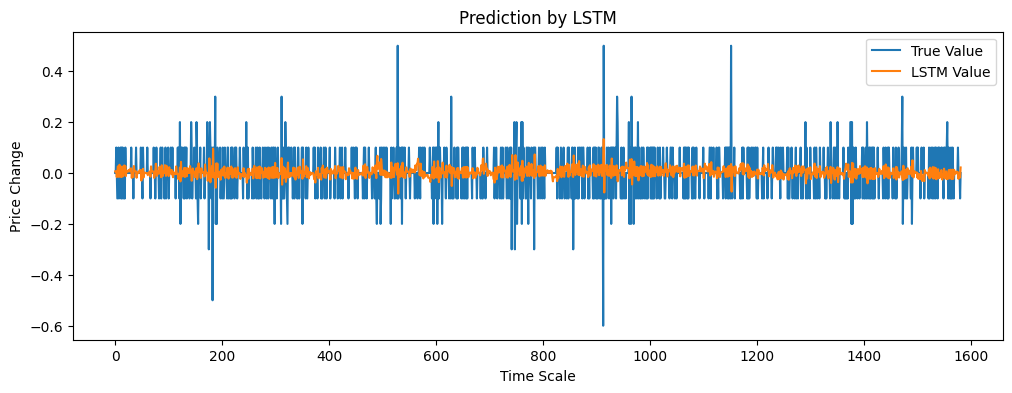

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Price Change')
plt.legend()
plt.show()

#### **2. PNJ**

In [ ]:
pnj_train, pnj_y = preprocess_data(pnj_stock)

In [ ]:
lr, y_pred, mse, mae, r2 = linear_regression_model(pnj_train, pnj_y,"2020-09-01")

Mean Squared Error (MSE): 0.031159590295017928
Mean Absolute Error (MAE): 0.10881386205988319
R² Score: 0.024904194237852062


In [ ]:
lstm, y_test, y_pred = train_lstm(pnj_train, pnj_y)

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_41 (LSTM)              (None, 64)                20224     
                                                                 
 dense_62 (Dense)            (None, 32)                2080      
                                                                 
 dense_63 (Dense)            (None, 1)                 33        
                                                                 
Total params: 22337 (87.25 KB)
Trainable params: 22337 (87.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
1912/1912 [==============================] - 12s 4ms/step - loss: 0.3626
Epoch 2/30
1912/1912 [==============================] - 6s 3ms/step - loss: 0.3388
Epoch 3/30
1912/1912 [==============================] - 5s 3ms/step - loss: 0.3306
Epoch 4/30
1912/1912 [=========

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')

Mean squared error: 0.03568043511240439
R2 score: -0.0684748767206389


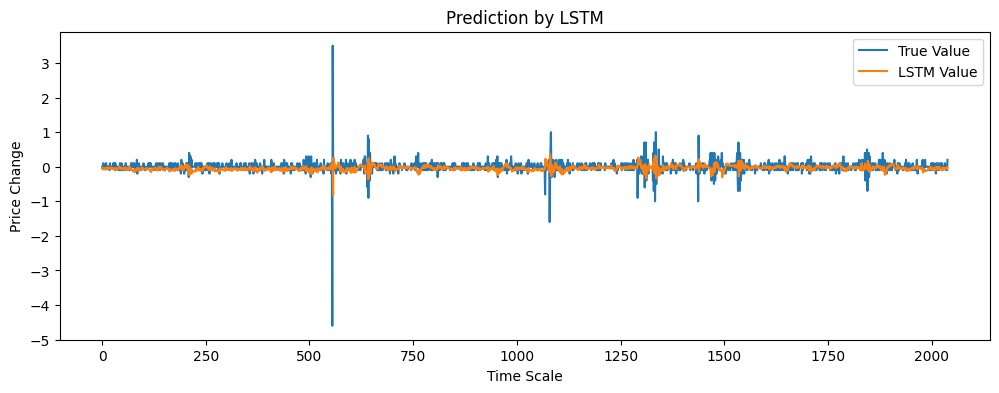

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Price Change')
plt.legend()
plt.show()

#### **3. MSN**

In [ ]:
msn_train, msn_y = preprocess_data(msn_stock)

In [ ]:
lr, y_pred, mse, mae, r2 = linear_regression_model(msn_train, msn_y,"2020-06-01")

Mean Squared Error (MSE): 0.05577692973543862
Mean Absolute Error (MAE): 0.12463797070150104
R² Score: 0.22642294222211234


In [ ]:
lstm, y_test, y_pred = train_lstm(msn_train, msn_y)

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 64)                20224     
                                                                 
 dense_70 (Dense)            (None, 32)                2080      
                                                                 
 dense_71 (Dense)            (None, 1)                 33        
                                                                 
Total params: 22337 (87.25 KB)
Trainable params: 22337 (87.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
2067/2067 [==============================] - 7s 3ms/step - loss: 0.0453
Epoch 2/30
2067/2067 [==============================] - 6s 3ms/step - loss: 0.0433
Epoch 3/30
2067/2067 [==============================] - 5s 2ms/step - loss: 0.0437
Epoch 4/30
2067/2067 [==========

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')

Mean squared error: 0.013097408780810504
R2 score: -0.15735631899589086


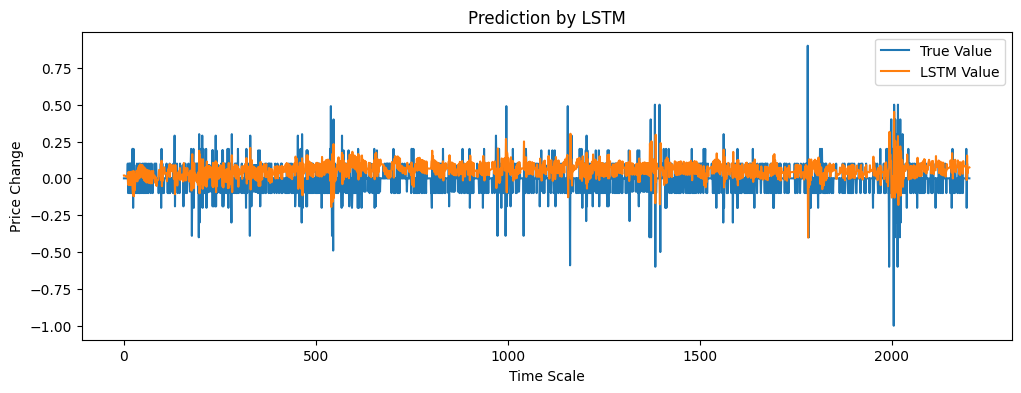

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Price Change')
plt.legend()
plt.show()

#### **4. VIC**

In [ ]:
vic_train, vic_y = preprocess_data(vic_stock)

In [ ]:
lr, y_pred, mse, mae, r2 = linear_regression_model(vic_train, vic_y,"2020-09-01")

Mean Squared Error (MSE): 0.03872389267106709
Mean Absolute Error (MAE): 0.10598289094742976
R² Score: 0.09534861190691779


In [ ]:
lstm, y_test, y_pred = train_lstm(vic_train, vic_y)

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 64)                20224     
                                                                 
 dense_68 (Dense)            (None, 32)                2080      
                                                                 
 dense_69 (Dense)            (None, 1)                 33        
                                                                 
Total params: 22337 (87.25 KB)
Trainable params: 22337 (87.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
1544/1544 [==============================] - 10s 5ms/step - loss: 0.0393
Epoch 2/30
1544/1544 [==============================] - 4s 3ms/step - loss: 0.0386
Epoch 3/30
1544/1544 [==============================] - 4s 2ms/step - loss: 0.0383
Epoch 4/30
1544/1544 [=========

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')

Mean squared error: 0.028395899839681254
R2 score: 0.06893080154698772


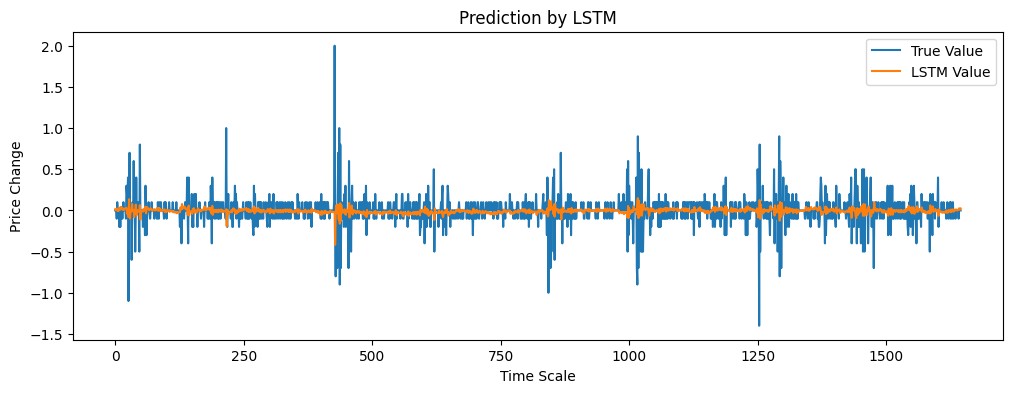

In [ ]:
plt.figure(figsize = (12,4))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Price Change')
plt.legend()
plt.show()

### **Data Preprocessing**

In [359]:
data

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Date,Price_Change
0,MSN,2017-12-25 09:15:00,73.1,73.1,73.1,73.1,4210,0,2017-12-25,-0.1
1,MSN,2017-12-25 09:16:00,73.0,73.0,73.0,73.0,5000,0,2017-12-25,0.5
2,MSN,2017-12-25 09:18:00,73.5,73.5,73.5,73.5,210,0,2017-12-25,-0.4
3,MSN,2017-12-25 09:20:00,73.2,73.5,73.1,73.1,2050,0,2017-12-25,-0.1
4,MSN,2017-12-25 09:21:00,73.0,73.0,73.0,73.0,1380,0,2017-12-25,0.1
...,...,...,...,...,...,...,...,...,...,...
97404,FPT,2020-12-22 14:29:00,58.1,58.1,58.1,58.1,2500,0,2020-12-22,0.0
97405,FPT,2020-12-22 14:46:00,58.1,58.1,58.1,58.1,11170,0,2020-12-22,20.2
125308,PNJ,2020-12-22 14:46:00,78.3,78.3,78.3,78.3,1500,0,2020-12-22,4.5
135353,MSN,2020-12-22 14:46:00,82.8,82.8,82.8,82.8,200,0,2020-12-22,22.9


In [386]:
df_stock = data.copy()
df_stock.set_index('Date/Time', inplace=True)

In [373]:
# Tính toán các chỉ báo kỹ thuật (ví dụ MA50, MA200, RSI, MACD)
def compute_RSI(series, period=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def compute_MACD(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    macd_signal = macd.ewm(span=signal_window, adjust=False).mean()
    macd_hist = macd - macd_signal
    return macd, macd_signal, macd_hist

In [387]:
df_stock['MA50'] = df_stock['Close'].rolling(window=50).mean()
df_stock['MA200'] = df_stock['Close'].rolling(window=200).mean()
df_stock['RSI'] = compute_RSI(df_stock['Close'])
df_stock['MACD'], df_stock['MACD_Signal'], df_stock['MACD_Hist'] = compute_MACD(df_stock['Close'])
df_stock['Pre_Price_Change'] = df_stock['Price_Change'].shift(1)

In [388]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_stock['Ticker_encoded'] = label_encoder.fit_transform(df_stock['Ticker'])

In [390]:
df_stock.dropna(inplace=True)

In [389]:
df_stock = df_stock.drop(columns=['Date','Ticker'], axis=1)

In [391]:
df_stock

,Open,High,Low,Close,Volume,Open Interest,Price_Change,MA50,MA200,RSI,MACD,MACD_Signal,MACD_Hist,Pre_Price_Change,Ticker_encoded
Date/Time,,,,,,,,,,,,,,,
2017-12-26 13:11:00,74.8,74.8,74.8,74.8,1400,0,0.0,74.906,74.2305,33.333333,-0.029543,-0.002788,-0.026755,0.0,1
2017-12-26 13:12:00,74.8,74.8,74.8,74.8,80,0,0.2,74.912,74.2390,33.333333,-0.035205,-0.009271,-0.025933,0.0,1
2017-12-26 13:16:00,74.9,75.0,74.9,75.0,6090,0,0.0,74.924,74.2490,60.000000,-0.023285,-0.012074,-0.011211,0.2,1
2017-12-26 13:17:00,75.0,75.0,75.0,75.0,2000,0,0.0,74.930,74.2565,60.000000,-0.013681,-0.012395,-0.001286,0.0,1
2017-12-26 13:23:00,74.8,75.0,74.8,75.0,4580,0,-0.1,74.936,74.2660,50.000000,-0.006000,-0.011116,0.005116,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22 14:27:00,82.8,82.8,82.8,82.8,300,0,-24.7,81.346,81.2930,53.872687,-1.497655,-0.817214,-0.680441,24.6,1
2020-12-22 14:29:00,58.1,58.1,58.1,58.1,2500,0,0.0,80.390,81.2960,46.127313,-2.975277,-1.248827,-1.726451,-24.7,0
2020-12-22 14:46:00,58.1,58.1,58.1,58.1,11170,0,20.2,79.988,81.1960,46.802418,-4.099052,-1.818872,-2.280180,0.0,0


## **1. Linear Rgression**

In [422]:
X = df_stock.drop(columns=['Price_Change'], axis=1)
y = df_stock['Price_Change']

In [423]:
# Chuyển đổi chuỗi ngày tháng sang kiểu datetime
split_date = pd.to_datetime("2020-06-01")

# Chia dữ liệu thành tập huấn luyện và kiểm tra theo ngày
train_X = X[X.index <= split_date]
test_X = X[X.index > split_date]
train_y = y[y.index <= split_date]
test_y = y[y.index > split_date]

In [416]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_X) 
X_test_scaled = scaler.transform(test_X)

In [424]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(train_X, train_y)

In [425]:
# Dự đoán giá trị trên tập kiểm tra
y_pred = pd.Series(model.predict(test_X), index=test_X.index)

# Đánh giá mô hình
mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)
mae = mean_absolute_error(test_y, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')


Mean Squared Error (MSE): 251.7084482590509
Mean Absolute Error (MAE): 13.193545949360194
R² Score: 0.6559503438473091


## **2. LSTM**

In [429]:
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

In [430]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(X_scale):
        X_train, X_test = X_scale[:len(train_index)],X_scale[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = y[:len(train_index)].ravel(), y[len(train_index): (len(train_index)+len(test_index))].ravel()

In [431]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [435]:
lstm = Sequential()
lstm.add(LSTM(50, return_sequences=True, input_shape=(1, trainX.shape[1]), activation='relu')) 
lstm.add(LSTM(50, return_sequences=False))  
lstm.add(Dense(25))  
lstm.add(Dense(1))

lstm.compile(optimizer='adam', loss='mse')
lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 50)             13000     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 34501 (134.77 KB)
Trainable params: 34501 (134.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [436]:
history = lstm.fit(X_train, y_train, epochs=20, batch_size=64,verbose=1, shuffle=False)

Epoch 1/20
6521/6521 [==============================] - 28s 4ms/step - loss: 414.7964
Epoch 2/20
6521/6521 [==============================] - 26s 4ms/step - loss: 412.6589
Epoch 3/20
6521/6521 [==============================] - 24s 4ms/step - loss: 412.5548
Epoch 4/20
6521/6521 [==============================] - 24s 4ms/step - loss: 412.2210
Epoch 5/20
6521/6521 [==============================] - 26s 4ms/step - loss: 412.0751
Epoch 6/20
6521/6521 [==============================] - 25s 4ms/step - loss: 411.6393
Epoch 7/20
6521/6521 [==============================] - 28s 4ms/step - loss: 411.2744
Epoch 8/20
6521/6521 [==============================] - 36s 6ms/step - loss: 410.9602
Epoch 9/20
6521/6521 [==============================] - 29s 4ms/step - loss: 410.8004
Epoch 10/20
6521/6521 [==============================] - 25s 4ms/step - loss: 410.6626
Epoch 11/20
6521/6521 [==============================] - 24s 4ms/step - loss: 410.4803
Epoch 12/20
6521/6521 [=============================

In [437]:
y_pred= lstm.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')

1305/1305 [==============================] - 4s 2ms/step
Mean squared error: 17.973730808905017
R2 score: 0.6090820264644294


## **3. ARIMA**

In [439]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

<Axes: ylabel='Density'>

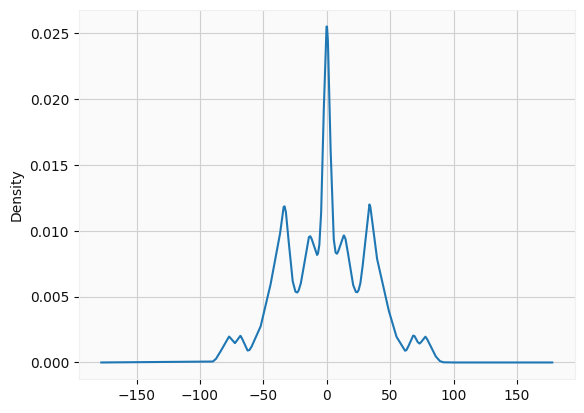

In [440]:
df_stock['Price_Change'].plot(kind='kde')

In [442]:
df_stock

,Open,High,Low,Close,Volume,Open Interest,Price_Change,MA50,MA200,RSI,MACD,MACD_Signal,MACD_Hist,Pre_Price_Change,Ticker_encoded
Date/Time,,,,,,,,,,,,,,,
2017-12-26 13:11:00,74.8,74.8,74.8,74.8,1400,0,0.0,74.906,74.2305,33.333333,-0.029543,-0.002788,-0.026755,0.0,1
2017-12-26 13:12:00,74.8,74.8,74.8,74.8,80,0,0.2,74.912,74.2390,33.333333,-0.035205,-0.009271,-0.025933,0.0,1
2017-12-26 13:16:00,74.9,75.0,74.9,75.0,6090,0,0.0,74.924,74.2490,60.000000,-0.023285,-0.012074,-0.011211,0.2,1
2017-12-26 13:17:00,75.0,75.0,75.0,75.0,2000,0,0.0,74.930,74.2565,60.000000,-0.013681,-0.012395,-0.001286,0.0,1
2017-12-26 13:23:00,74.8,75.0,74.8,75.0,4580,0,-0.1,74.936,74.2660,50.000000,-0.006000,-0.011116,0.005116,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22 14:27:00,82.8,82.8,82.8,82.8,300,0,-24.7,81.346,81.2930,53.872687,-1.497655,-0.817214,-0.680441,24.6,1
2020-12-22 14:29:00,58.1,58.1,58.1,58.1,2500,0,0.0,80.390,81.2960,46.127313,-2.975277,-1.248827,-1.726451,-24.7,0
2020-12-22 14:46:00,58.1,58.1,58.1,58.1,11170,0,20.2,79.988,81.1960,46.802418,-4.099052,-1.818872,-2.280180,0.0,0


In [441]:
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}: {value}')



In [443]:
# Check stationarity
check_stationarity(df_stock['Price_Change'])

In [ ]:


# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(arima_df.index, arima_df['Revenue_diff'], marker='o')
plt.title('Differenced Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Revenue')
plt.grid(True)
plt.show()


Nhìn chung, model dự đoán giá trị biến động được tính theo ngày khá là khả quan đối với xu thế giá chung được gộp từ giá trị của 4 mã cổ phiếu. Tuy nhiên khi dự đoán riêng đối với từng mã thì lại không cho kết quả mong. Dựa vào các đồ thị, nhận thấy model dự đoán được đúng xu thế biến động tăng giảm mà không dự đoán được chính xác giá trị và còn sai khác khá lớn. Điều này làm cho model không có tính hiệu quả và không áp dụng được. Nếu như mua với khối lượng lớn sẽ gây ảnh hưởng đáng kể.

# **Reference**

- Backtest chiến lược để xác định lợi nhuận và tỷ suất lợi nhuận: Sử dụng Bollinger Bands, Keltner Channel, RSI: https://eodhd.com/financial-academy/technical-analysis-examples/trading-stocks-using-bollinger-bands-keltner-channel-and-rsi-in-python

- ARIMA: https://www.kaggle.com/code/nageshsingh/stock-market-forecasting-arima